# Gambiarra

## Restarte o runtime pra usar CONDA

In [1]:
# # This code is designed to be run in a Google Colab notebook.

# # Step 1: Set the Python version to 3.11
# # Note: Colab's environment setup might take some time after this command.
# # You might see some warnings or errors during the process, but it should eventually switch.
# print("Setting Python version to 3.11...")
# !sudo apt-get update -y
# !sudo apt-get install python3.11 python3.11-dev python3.11-venv -y
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2
# !sudo update-alternatives --config python3
# print("Python version set to 3.11 (attempted). Please verify in the next step.")

# # Step 2: Verify the Python version
# import sys
# print(f"\nCurrently using Python version: {sys.version}")
# if sys.version_info[:2] != (3, 11):
#     print("\nWARNING: The Python version might not be 3.11 yet. "
#           "If it's not, you might need to restart the runtime "
#           "(Runtime > Restart runtime) and run this cell again.")
# else:
#     print("\nPython version 3.11 is confirmed.")

# # Step 3: Create and activate a virtual environment (optional but recommended for isolation)
# # Note: While you can create a virtual environment in Colab, it's often not strictly necessary
# # as Colab provides an isolated environment per notebook. However, if you want to mimic
# # a local development setup, you can do this.
# print("\nCreating and activating a virtual environment...")
# !python3.11 -m venv myenv
# !source myenv/bin/activate

# # Note: After activating the virtual environment, Colab might not immediately reflect the change
# # in the notebook's shell. You might need to run subsequent pip commands with the full path
# # to the pip executable within the virtual environment, or simply rely on Colab's isolation.

# # Step 4: Install the required packages using pip
# print("\nInstalling the required packages...")
# !pip install --upgrade pip
# !pip install matplotlib numpy pandas seaborn scikit-learn xgboost catboost imbalanced-learn ucimlrepo

# print("\nAll required packages have been installed.")

# # Step 5: Verify the installation of packages (optional)
# print("\nVerifying package installations...")
# try:
#     import matplotlib
#     print(f"matplotlib version: {matplotlib.__version__}")
#     import numpy
#     print(f"numpy version: {numpy.__version__}")
#     import pandas
#     print(f"pandas version: {pandas.__version__}")
#     import seaborn
#     print(f"seaborn version: {seaborn.__version__}")
#     import sklearn
#     print(f"scikit-learn version: {sklearn.__version__}")
#     import xgboost
#     print(f"xgboost version: {xgboost.__version__}")
#     import catboost
#     print(f"catboost version: {catboost.__version__}")
#     import imbalanced_learn
#     print(f"imbalanced-learn version: {imbalanced_learn.__version__}")
#     import ucimlrepo
#     print(f"ucimlrepo version: {ucimlrepo.__version__}")
#     print("\nAll packages imported successfully.")
# except ImportError as e:
#     print(f"\nError importing a package: {e}")
#     print("Please check the installation steps.")

# print("\nSetup complete. You can now start using the environment with the specified packages.")

Setting Python version to 3.11...
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.9 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,757 kB]
Get:13 https://developer.download.

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# Importing Libraries

In [28]:
!pip install matplotlib numpy pandas seaborn scikit-learn xgboost catboost imbalanced-learn ucimlrepo optuna

In [29]:
from collections import Counter, defaultdict
from itertools import combinations
import time
import warnings

from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import joblib
from lightgbm import LGBMClassifier
import matplotlib.gridspec as GridSpec
import matplotlib.pyplot as plt
import numpy as np
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from ucimlrepo import fetch_ucirepo
from xgboost import XGBClassifier

In [22]:
# Configurações
np.random.seed(42)  # Para reprodutibilidade
plt.style.use("ggplot")

# Parâmetros do algoritmo genético
POPULATION_SIZE = 20
MIN_FEATURES = 2
MAX_FEATURES = 14  # Limitado pelo maior k testado
MAX_GENERATIONS = 15
ELITE_PERCENT = 0.2
MUTATION_PROBABILITY = 0.1

# Data Loading

In [3]:
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936)
X = national_poll_on_healthy_aging_npha.data.features
y = national_poll_on_healthy_aging_npha.data.targets
df = pd.merge(X, y, left_index=True, right_index=True)

# 1. EDA

## Checagem básica
Nessa etapa veremos a dimensão, se o dataset possui valores nulos e valores duplicados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Age                                         714 non-null    int64
 1   Physical_Health                             714 non-null    int64
 2   Mental_Health                               714 non-null    int64
 3   Dental_Health                               714 non-null    int64
 4   Employment                                  714 non-null    int64
 5   Stress_Keeps_Patient_from_Sleeping          714 non-null    int64
 6   Medication_Keeps_Patient_from_Sleeping      714 non-null    int64
 7   Pain_Keeps_Patient_from_Sleeping            714 non-null    int64
 8   Bathroom_Needs_Keeps_Patient_from_Sleeping  714 non-null    int64
 9   Uknown_Keeps_Patient_from_Sleeping          714 non-null    int64
 10  Trouble_Sleeping                      

In [5]:
print(f"Qtde Valores Nulos: {df.isnull().sum()}")

print(f"Qtde Valores Duplicados: {df.duplicated().sum()}")

Qtde Valores Nulos: Age                                           0
Physical_Health                               0
Mental_Health                                 0
Dental_Health                                 0
Employment                                    0
Stress_Keeps_Patient_from_Sleeping            0
Medication_Keeps_Patient_from_Sleeping        0
Pain_Keeps_Patient_from_Sleeping              0
Bathroom_Needs_Keeps_Patient_from_Sleeping    0
Uknown_Keeps_Patient_from_Sleeping            0
Trouble_Sleeping                              0
Prescription_Sleep_Medication                 0
Race                                          0
Gender                                        0
Number_of_Doctors_Visited                     0
dtype: int64
Qtde Valores Duplicados: 42


**Mapeamento dos Dados**: Irei alterar a distribuição de alguns dos valores para fazer mais sentido para minha ordenação

In [6]:
# Mapeamento dos valores das features conforme solicitado
print("Aplicando mapeamento de valores às features...")

# Physical_Health e Mental_Health
health_mapping = {-1: 0, 5: 1, 4: 2, 3: 3, 2: 4, 1: 5}
df["Physical_Health"] = (
    df["Physical_Health"].map(health_mapping).fillna(df["Physical_Health"])
)
df["Mental_Health"] = (
    df["Mental_Health"].map(health_mapping).fillna(df["Mental_Health"])
)

# Dental_Health
dental_mapping = {
    -1: 0,
    5: 1,
    4: 2,
    3: 3,
    2: 4,
    1: 5,
}  # Usando 5 como substituição para 6
# Verificar se algum valor 6 existe e substituir pela mediana se necessário
if 6 in df["Dental_Health"].values:
    median_value = df[df["Dental_Health"].between(1, 5)]["Dental_Health"].median()
    dental_mapping[6] = median_value
df["Dental_Health"] = (
    df["Dental_Health"].map(dental_mapping).fillna(df["Dental_Health"])
)

# Employment
employment_mapping = {
    1: 3,
    2: 2,
    3: 1,
    4: 0,
    -1: 0,
}  # Adicionei -1: 0 para tratar recusas
df["Employment"] = df["Employment"].map(employment_mapping).fillna(df["Employment"])

# Prescription_Sleep_Medication
medication_mapping = {-1: 0, 1: 3, 2: 2, 3: 1}
df["Prescription_Sleep_Medication"] = (
    df["Prescription_Sleep_Medication"]
    .map(medication_mapping)
    .fillna(df["Prescription_Sleep_Medication"])
)

df = df.astype(int)

print("Mapeamento concluído.")

Aplicando mapeamento de valores às features...
Mapeamento concluído.


In [7]:
feature_mappings = {
    "Number of Doctors Visited": {1: "0-1 doctors", 2: "2-3 doctors", 3: "4+ doctors"},
    "Age": {1: "50-64", 2: "65-80"},
    "Physical Health": {
        0: "Refused",
        1: "Poor",
        2: "Fair",
        3: "Good",
        4: "Very Good",
        5: "Excellent",
    },
    "Mental Health": {
        0: "Refused",
        1: "Poor",
        2: "Fair",
        3: "Good",
        4: "Very Good",
        5: "Excellent",
    },
    "Dental Health": {
        0: "Refused",
        1: "Poor",
        2: "Fair",
        3: "Good",
        4: "Very Good",
        5: "Excellent",
    },
    "Employment": {
        0: "Not working/Refused",
        1: "Retired",
        2: "Working part-time",
        3: "Working full-time",
    },
    "Stress Keeps Patient from Sleeping": {0: "No", 1: "Yes"},
    "Medication Keeps Patient from Sleeping": {0: "No", 1: "Yes"},
    "Pain Keeps Patient from Sleeping": {0: "No", 1: "Yes"},
    "Bathroom Needs Keeps Patient from Sleeping": {0: "No", 1: "Yes"},
    "Uknown Keeps Patient from Sleeping": {0: "No", 1: "Yes"},
    "Trouble Sleeping": {0: "No", 1: "Yes", 2: "Sometimes", 3: "Unknown"},
    "Prescription Sleep Medication": {
        0: "Refused",
        1: "Do not use",
        2: "Use occasionally",
        3: "Use regularly",
    },
    "Race": {
        -2: "Not asked",
        -1: "Refused",
        1: "White, Non-Hispanic",
        2: "Black, Non-Hispanic",
        3: "Other, Non-Hispanic",
        4: "Hispanic",
        5: "2+ Races, Non-Hispanic",
    },
    "Gender": {-2: "Not asked", -1: "Refused", 1: "Male", 2: "Female"},
}

**Conclusão da Etapa**: Nessa etapa vimos que não temos nenhum dado nulo, mas vimos que temos linhas duplicadas no conjunto de dados. Iremos removê-las na etapa de tratamento dos dados pois tratam-se de dados redundantes

## Visualização dos Dados
Nessa etapa iremos utilizar as visualizações de Barplots, Boxplots, Violin Plots e Heatmaps

In [8]:
# Função para criar um mosaico de barplots
def create_barplot_mosaic(save_image=False, save_path="."):
    # Definir o número de colunas e calcular o número de linhas necessárias
    n_cols = 3
    n_rows = int(np.ceil(len(df.columns) / n_cols))

    # Criar a figura
    plt.figure(figsize=(20, 5 * n_rows))

    # Plotar barplots para cada feature
    for i, col in enumerate(df.columns):
        plt.subplot(n_rows, n_cols, i + 1)

        # Contar os valores para cada categoria
        value_counts = df[col].value_counts().sort_index()

        # Criar barplot
        ax = sns.barplot(x=value_counts.index, y=value_counts.values)

        # Ajustar os ticks do eixo x
        plt.xticks(
            range(len(value_counts)),
            [str(val) for val in value_counts.index],
            rotation=45,
            ha="right",
        )

        plt.title(f"Distribuição de {col}")
        plt.tight_layout()

    plt.suptitle("Mosaico de Barplots para todas as Features", fontsize=20, y=1.02)
    plt.tight_layout()

    if save_image:
        plt.savefig(f"{save_path}/barplot_mosaic.png", dpi=300, bbox_inches="tight")

    plt.show()


# Função para criar um mosaico de boxplots
def create_boxplot_mosaic(save_image=False, save_path="."):
    # Definir o número de colunas e calcular o número de linhas necessárias
    n_cols = 3
    n_rows = int(np.ceil(len(df.columns) / n_cols))

    # Criar a figura
    plt.figure(figsize=(20, 5 * n_rows))

    # Plotar boxplots para cada feature
    for i, col in enumerate(df.columns):
        plt.subplot(n_rows, n_cols, i + 1)

        # Criar boxplot
        sns.boxplot(x=df[col])

        plt.title(f"Boxplot de {col}")
        plt.tight_layout()

    plt.suptitle("Mosaico de Boxplots para todas as Features", fontsize=20, y=1.02)
    plt.tight_layout()

    if save_image:
        plt.savefig(f"{save_path}/boxplot_mosaic.png", dpi=300, bbox_inches="tight")

    plt.show()


# Função para criar um mosaico de violin plots
def create_violinplot_mosaic(save_image=False, save_path="."):
    # Definir o número de colunas e calcular o número de linhas necessárias
    n_cols = 3
    n_rows = int(np.ceil(len(df.columns) / n_cols))

    # Criar a figura
    plt.figure(figsize=(20, 5 * n_rows))

    # Plotar violin plots para cada feature
    for i, col in enumerate(df.columns):
        plt.subplot(n_rows, n_cols, i + 1)

        # Criar violin plot
        sns.violinplot(x=df[col])

        plt.title(f"Violin Plot de {col}")
        plt.tight_layout()

    plt.suptitle("Mosaico de Violin Plots para todas as Features", fontsize=20, y=1.02)
    plt.tight_layout()

    if save_image:
        plt.savefig(f"{save_path}/violinplot_mosaic.png", dpi=300, bbox_inches="tight")

    plt.show()


# Função para criar um mapa de calor de correlação
def create_correlation_heatmap(save_image=False, save_path=".", linear_corr=True):
    # Criar a figura
    plt.figure(figsize=(16, 14))

    # Calcular a matriz de correlação
    if linear_corr:
        corr_matrix = df.corr(method="pearson")
    else:
        corr_matrix = df.corr(method="spearman")

    # Criar o mapa de calor
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        mask=mask,
        square=True,
        linewidths=0.5,
    )

    plt.title("Mapa de Calor de Correlação", fontsize=20)
    plt.tight_layout()

    if save_image:
        plt.savefig(
            f"{save_path}/correlation_heatmap.png", dpi=300, bbox_inches="tight"
        )

    plt.show()


# Função para criar um mosaico de scatter plots entre o target e as features
def create_scatter_mosaic(save_image=False, save_path="."):
    target = "Number_of_Doctors_Visited"
    features = [col for col in df.columns if col != target]

    # Definir o número de colunas e calcular o número de linhas necessárias
    n_cols = 3
    n_rows = int(np.ceil(len(features) / n_cols))

    # Criar a figura
    plt.figure(figsize=(20, 5 * n_rows))

    # Mapear as cores para os valores do target
    colors = {1: "blue", 2: "green", 3: "red"}

    # Plotar a relação de cada feature com o target usando scatter plot
    for i, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1)

        # Adicionar jitter para melhor visualização (dados discretos podem se sobrepor)
        x = df[feature] + np.random.normal(0, 0.1, size=len(df))
        y = df[target] + np.random.normal(0, 0.1, size=len(df))

        # Criar scatter plot com cores baseadas no target
        for target_val in sorted(df[target].unique()):
            mask = df[target] == target_val
            plt.scatter(
                x[mask],
                y[mask],
                alpha=0.5,
                label=f"Classe {target_val}",
                color=colors.get(target_val, f"C{target_val}"),
            )

        # Ajustar limites para melhor visualização
        plt.xlim(df[feature].min() - 0.5, df[feature].max() + 0.5)
        plt.ylim(df[target].min() - 0.5, df[target].max() + 0.5)

        # Ajustar ticks para mostrar apenas os valores originais
        plt.xticks(sorted(df[feature].unique()))
        plt.yticks(sorted(df[target].unique()))

        # Adicionar linhas de grade para facilitar a visualização
        plt.grid(True, linestyle="--", alpha=0.7)

        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f"Relação entre {feature} e {target}")

        # Adicionar legenda apenas no primeiro gráfico
        if i == 0:
            plt.legend()

    plt.suptitle(
        f"Scatter Plots: Relações entre Features e {target}", fontsize=20, y=1.02
    )
    plt.tight_layout()

    if save_image:
        plt.savefig(f"{save_path}/scatter_mosaic.png", dpi=300, bbox_inches="tight")

    plt.show()

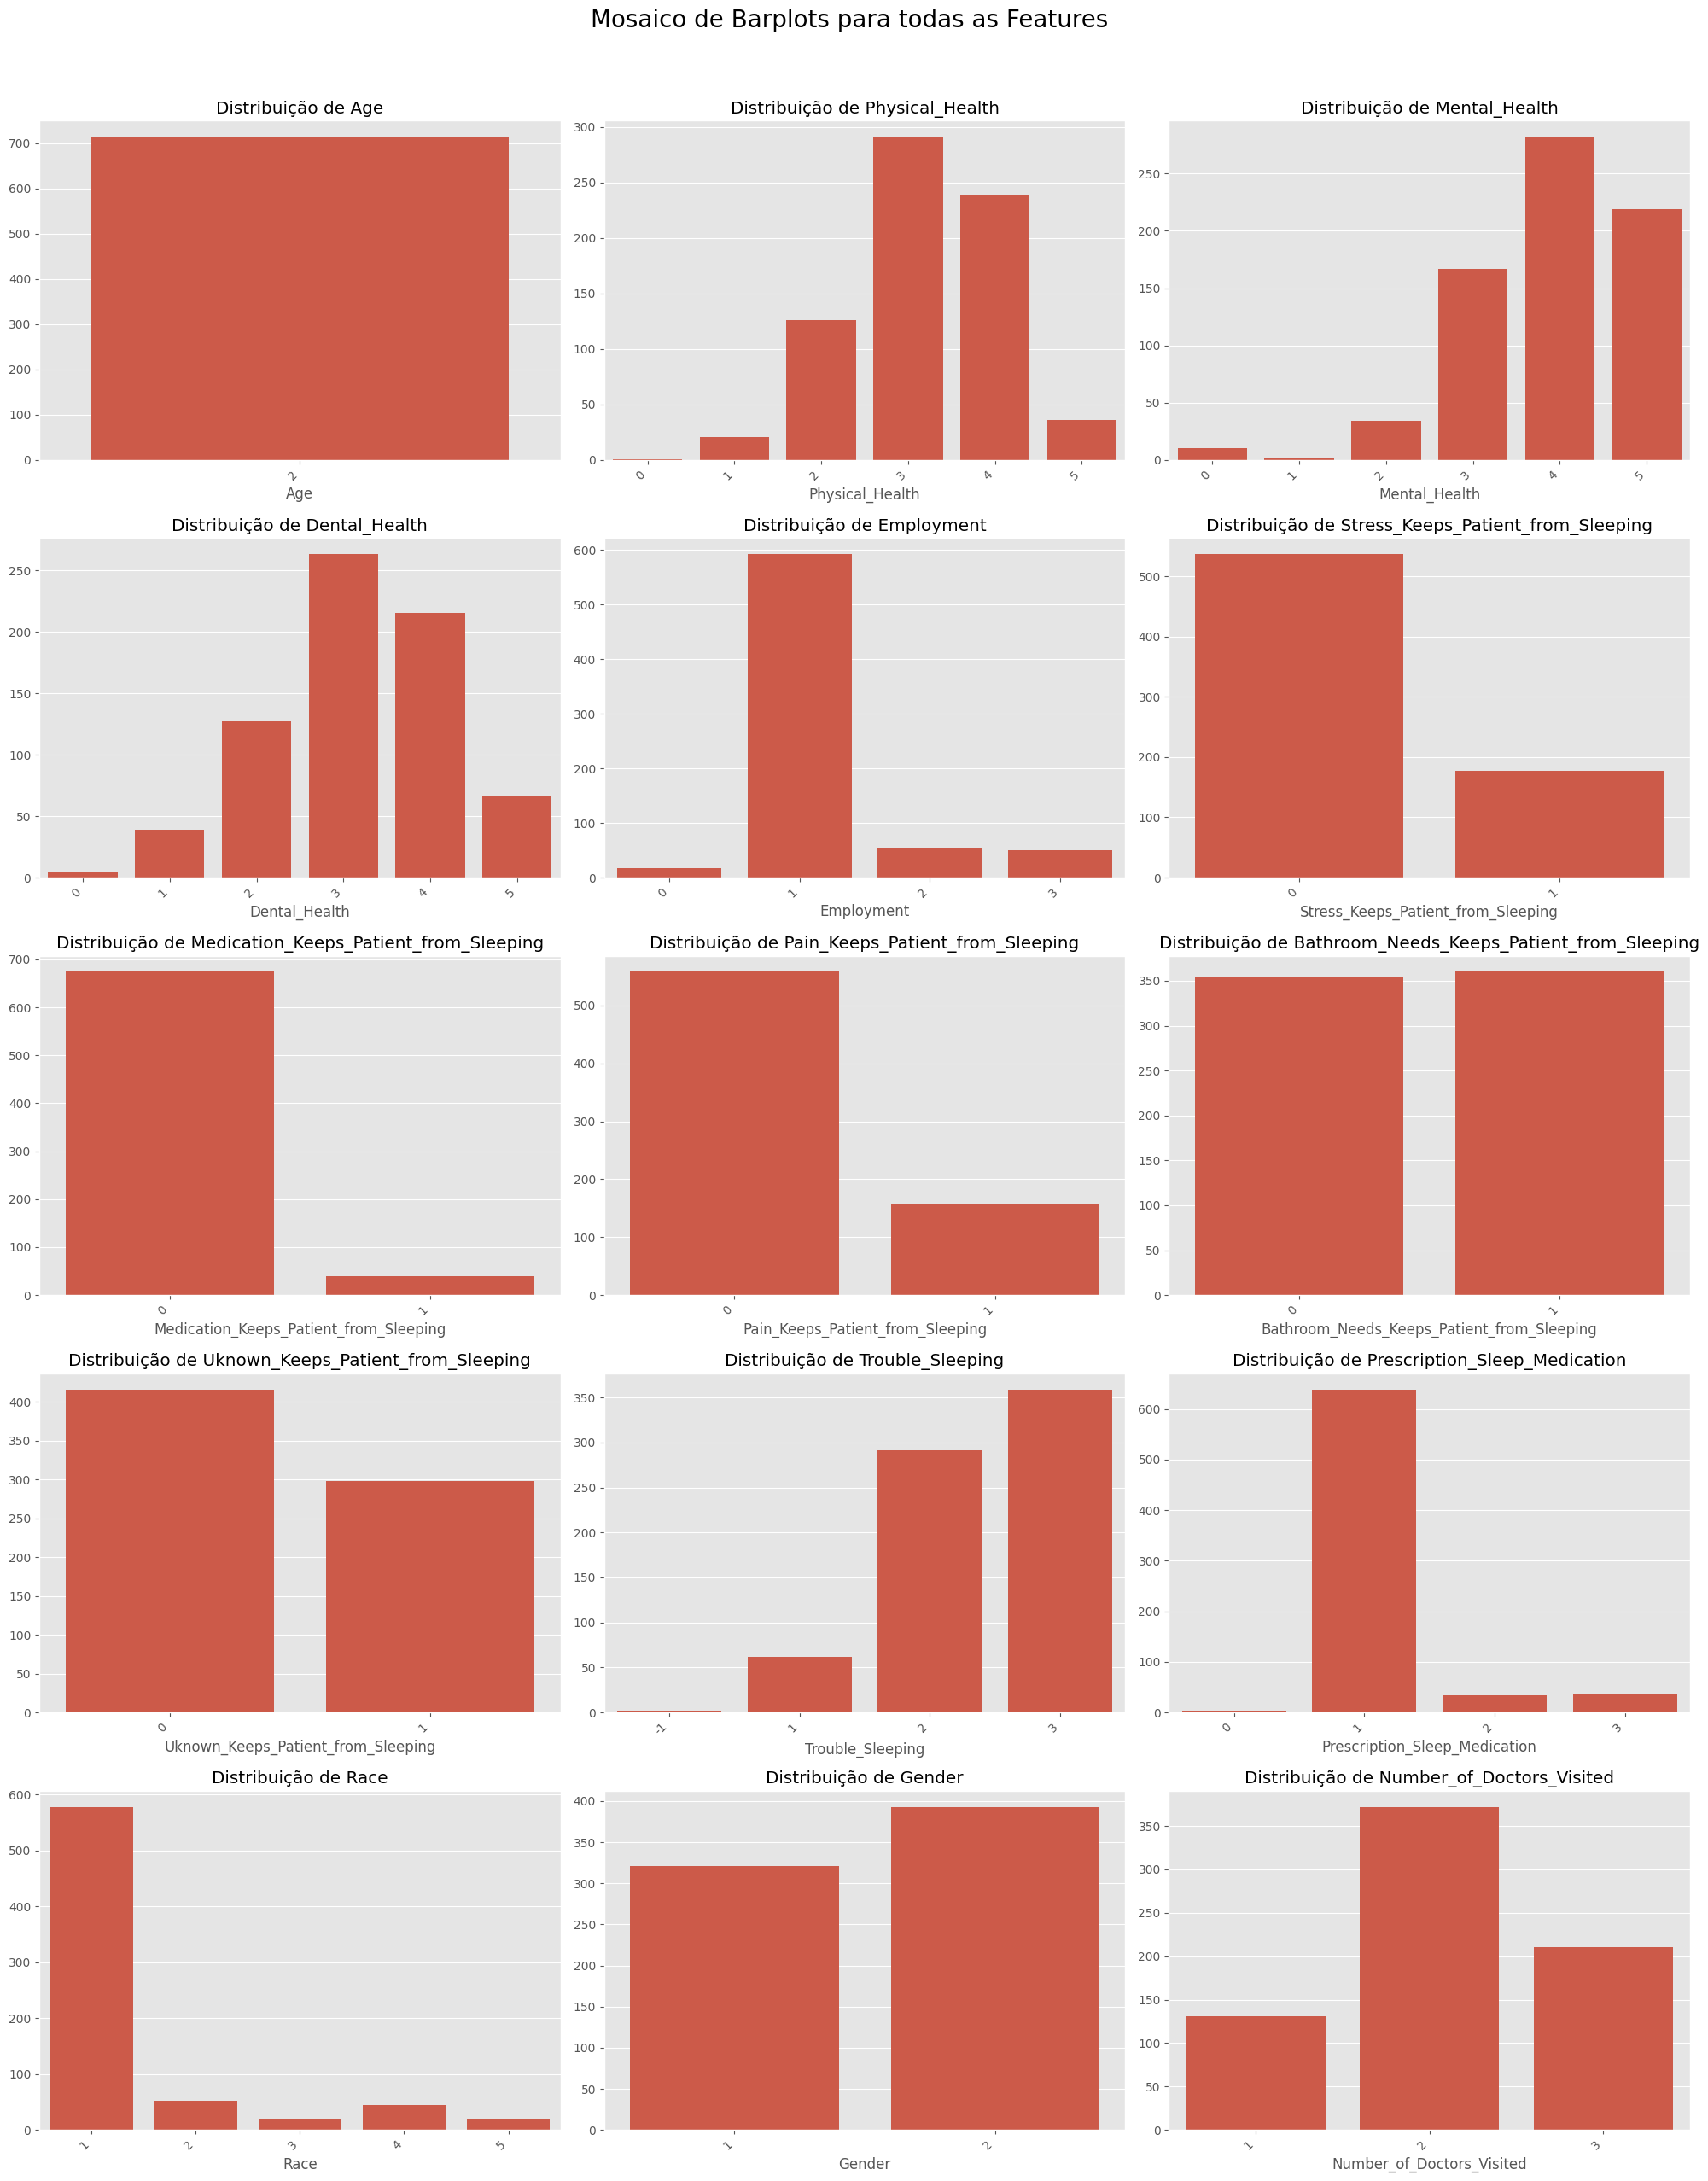

In [9]:
create_barplot_mosaic()

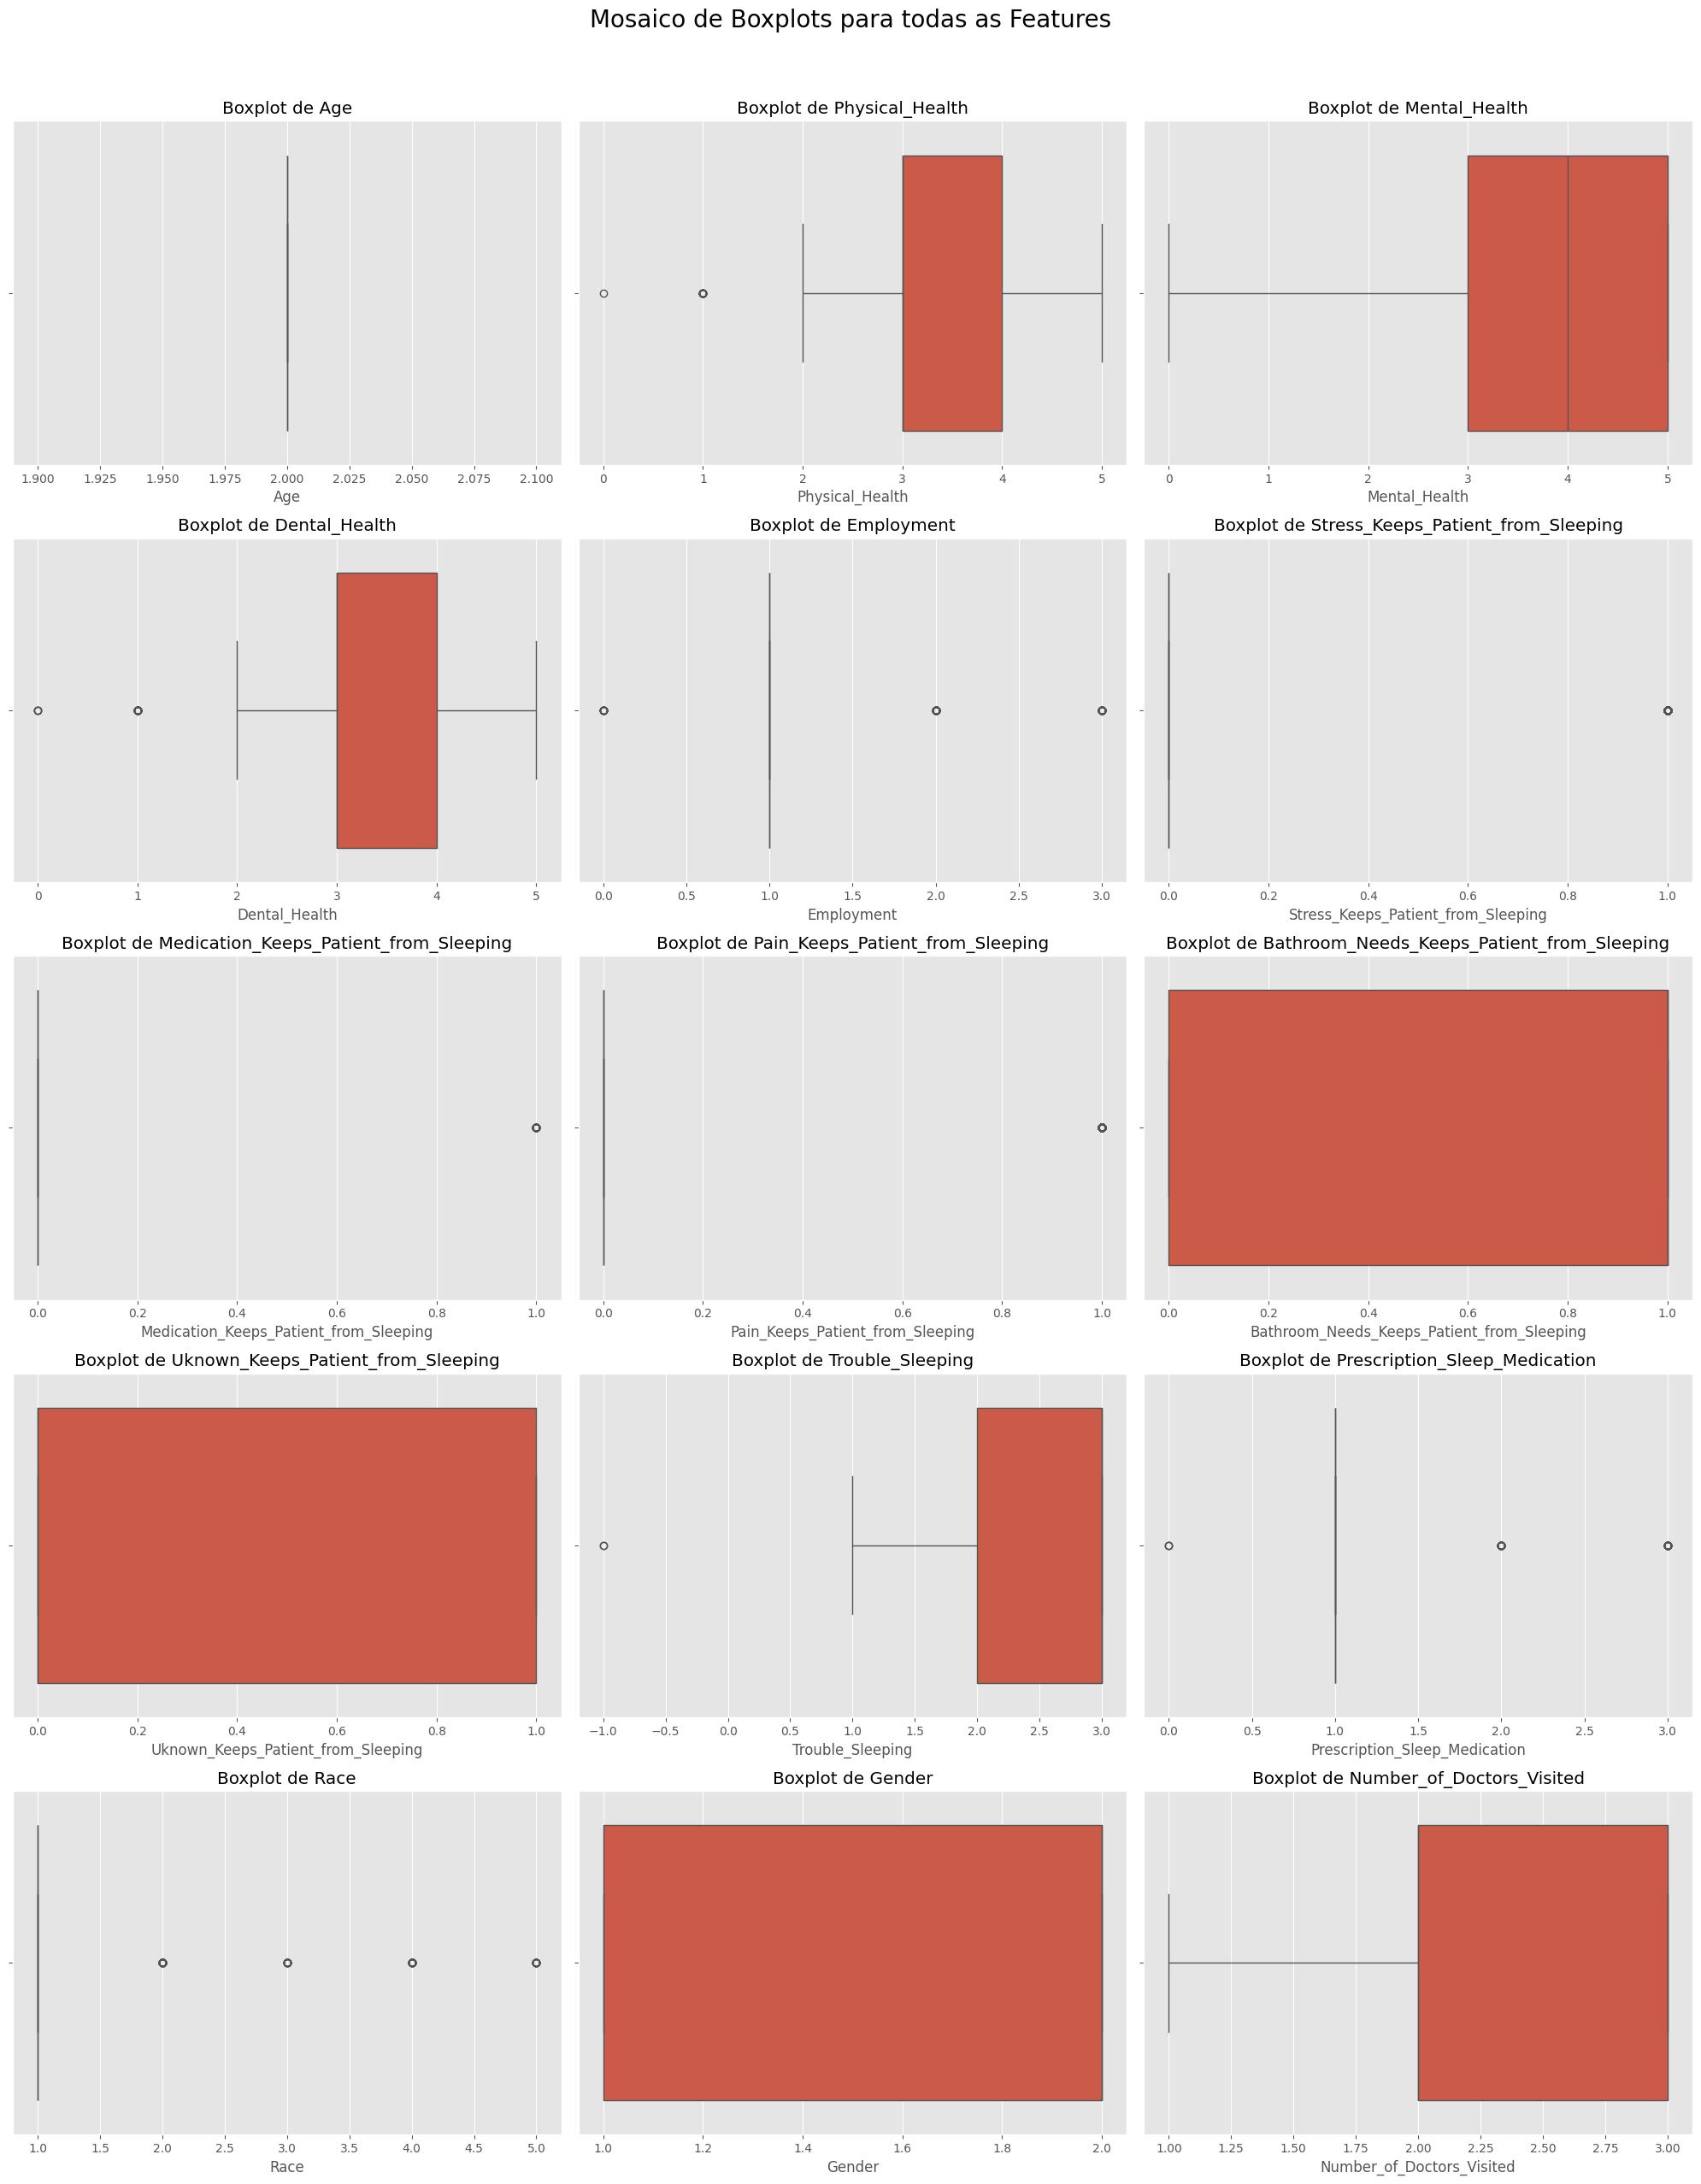

In [10]:
create_boxplot_mosaic()

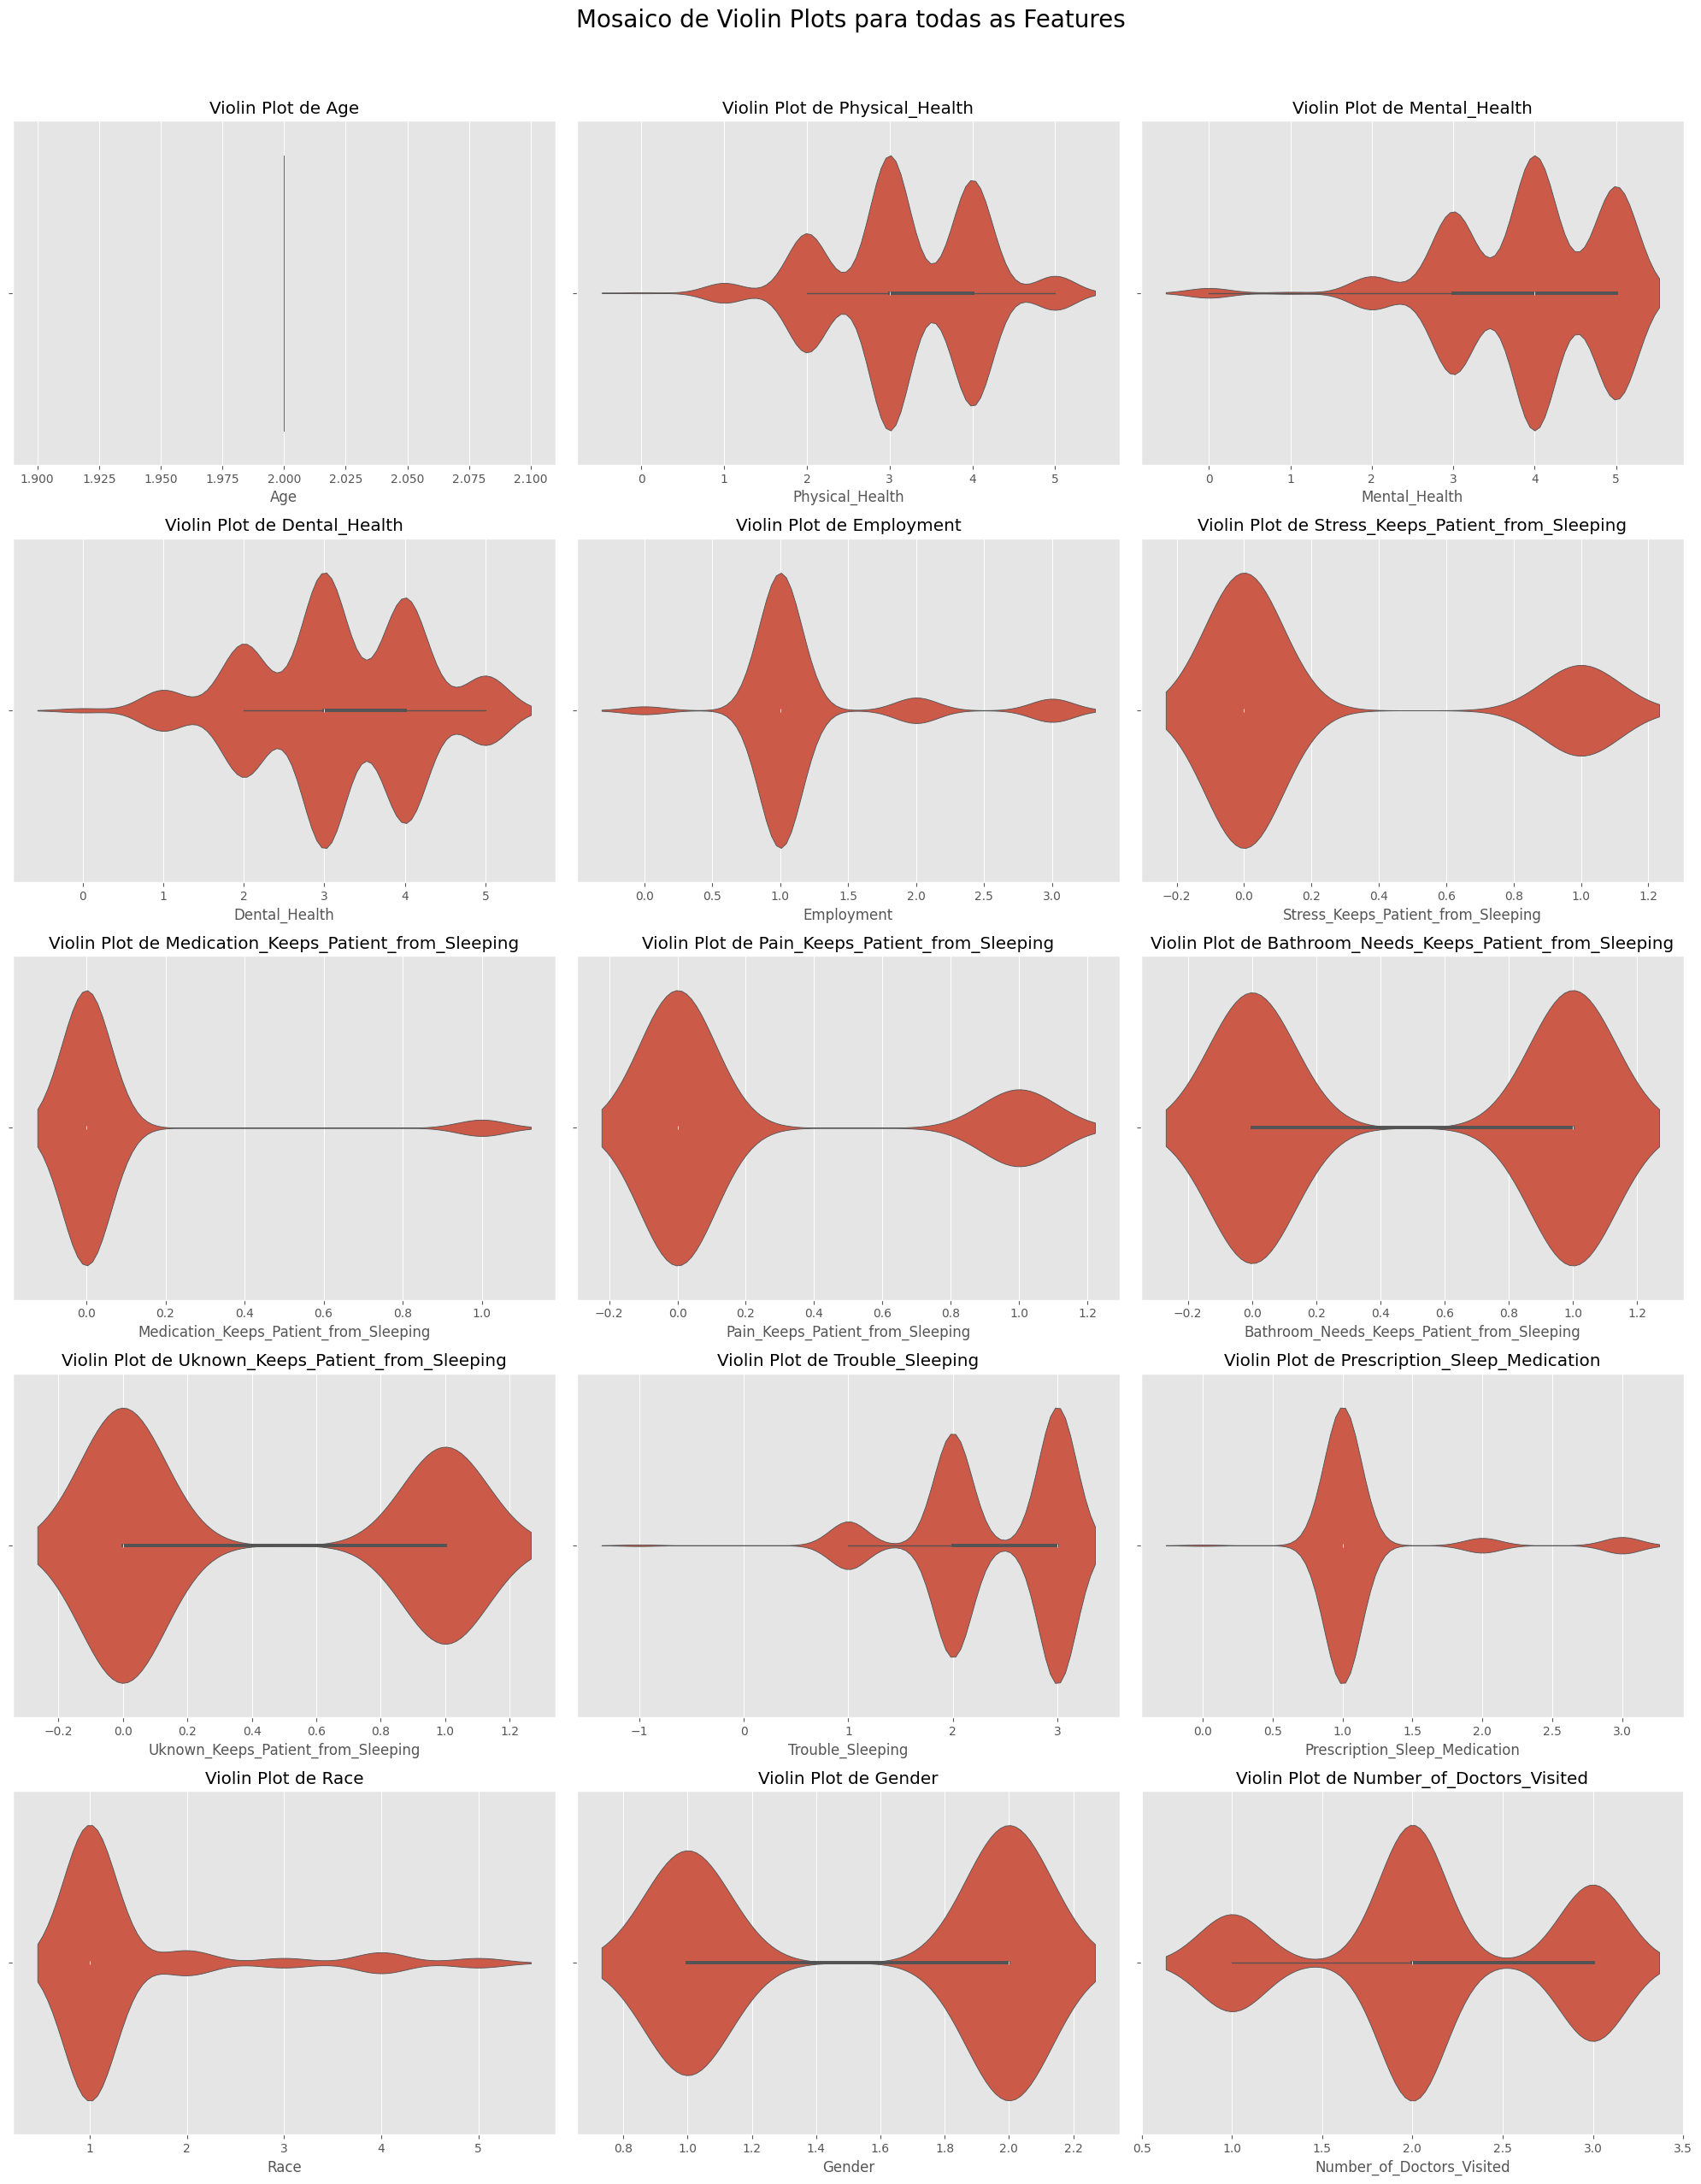

In [11]:
create_violinplot_mosaic()

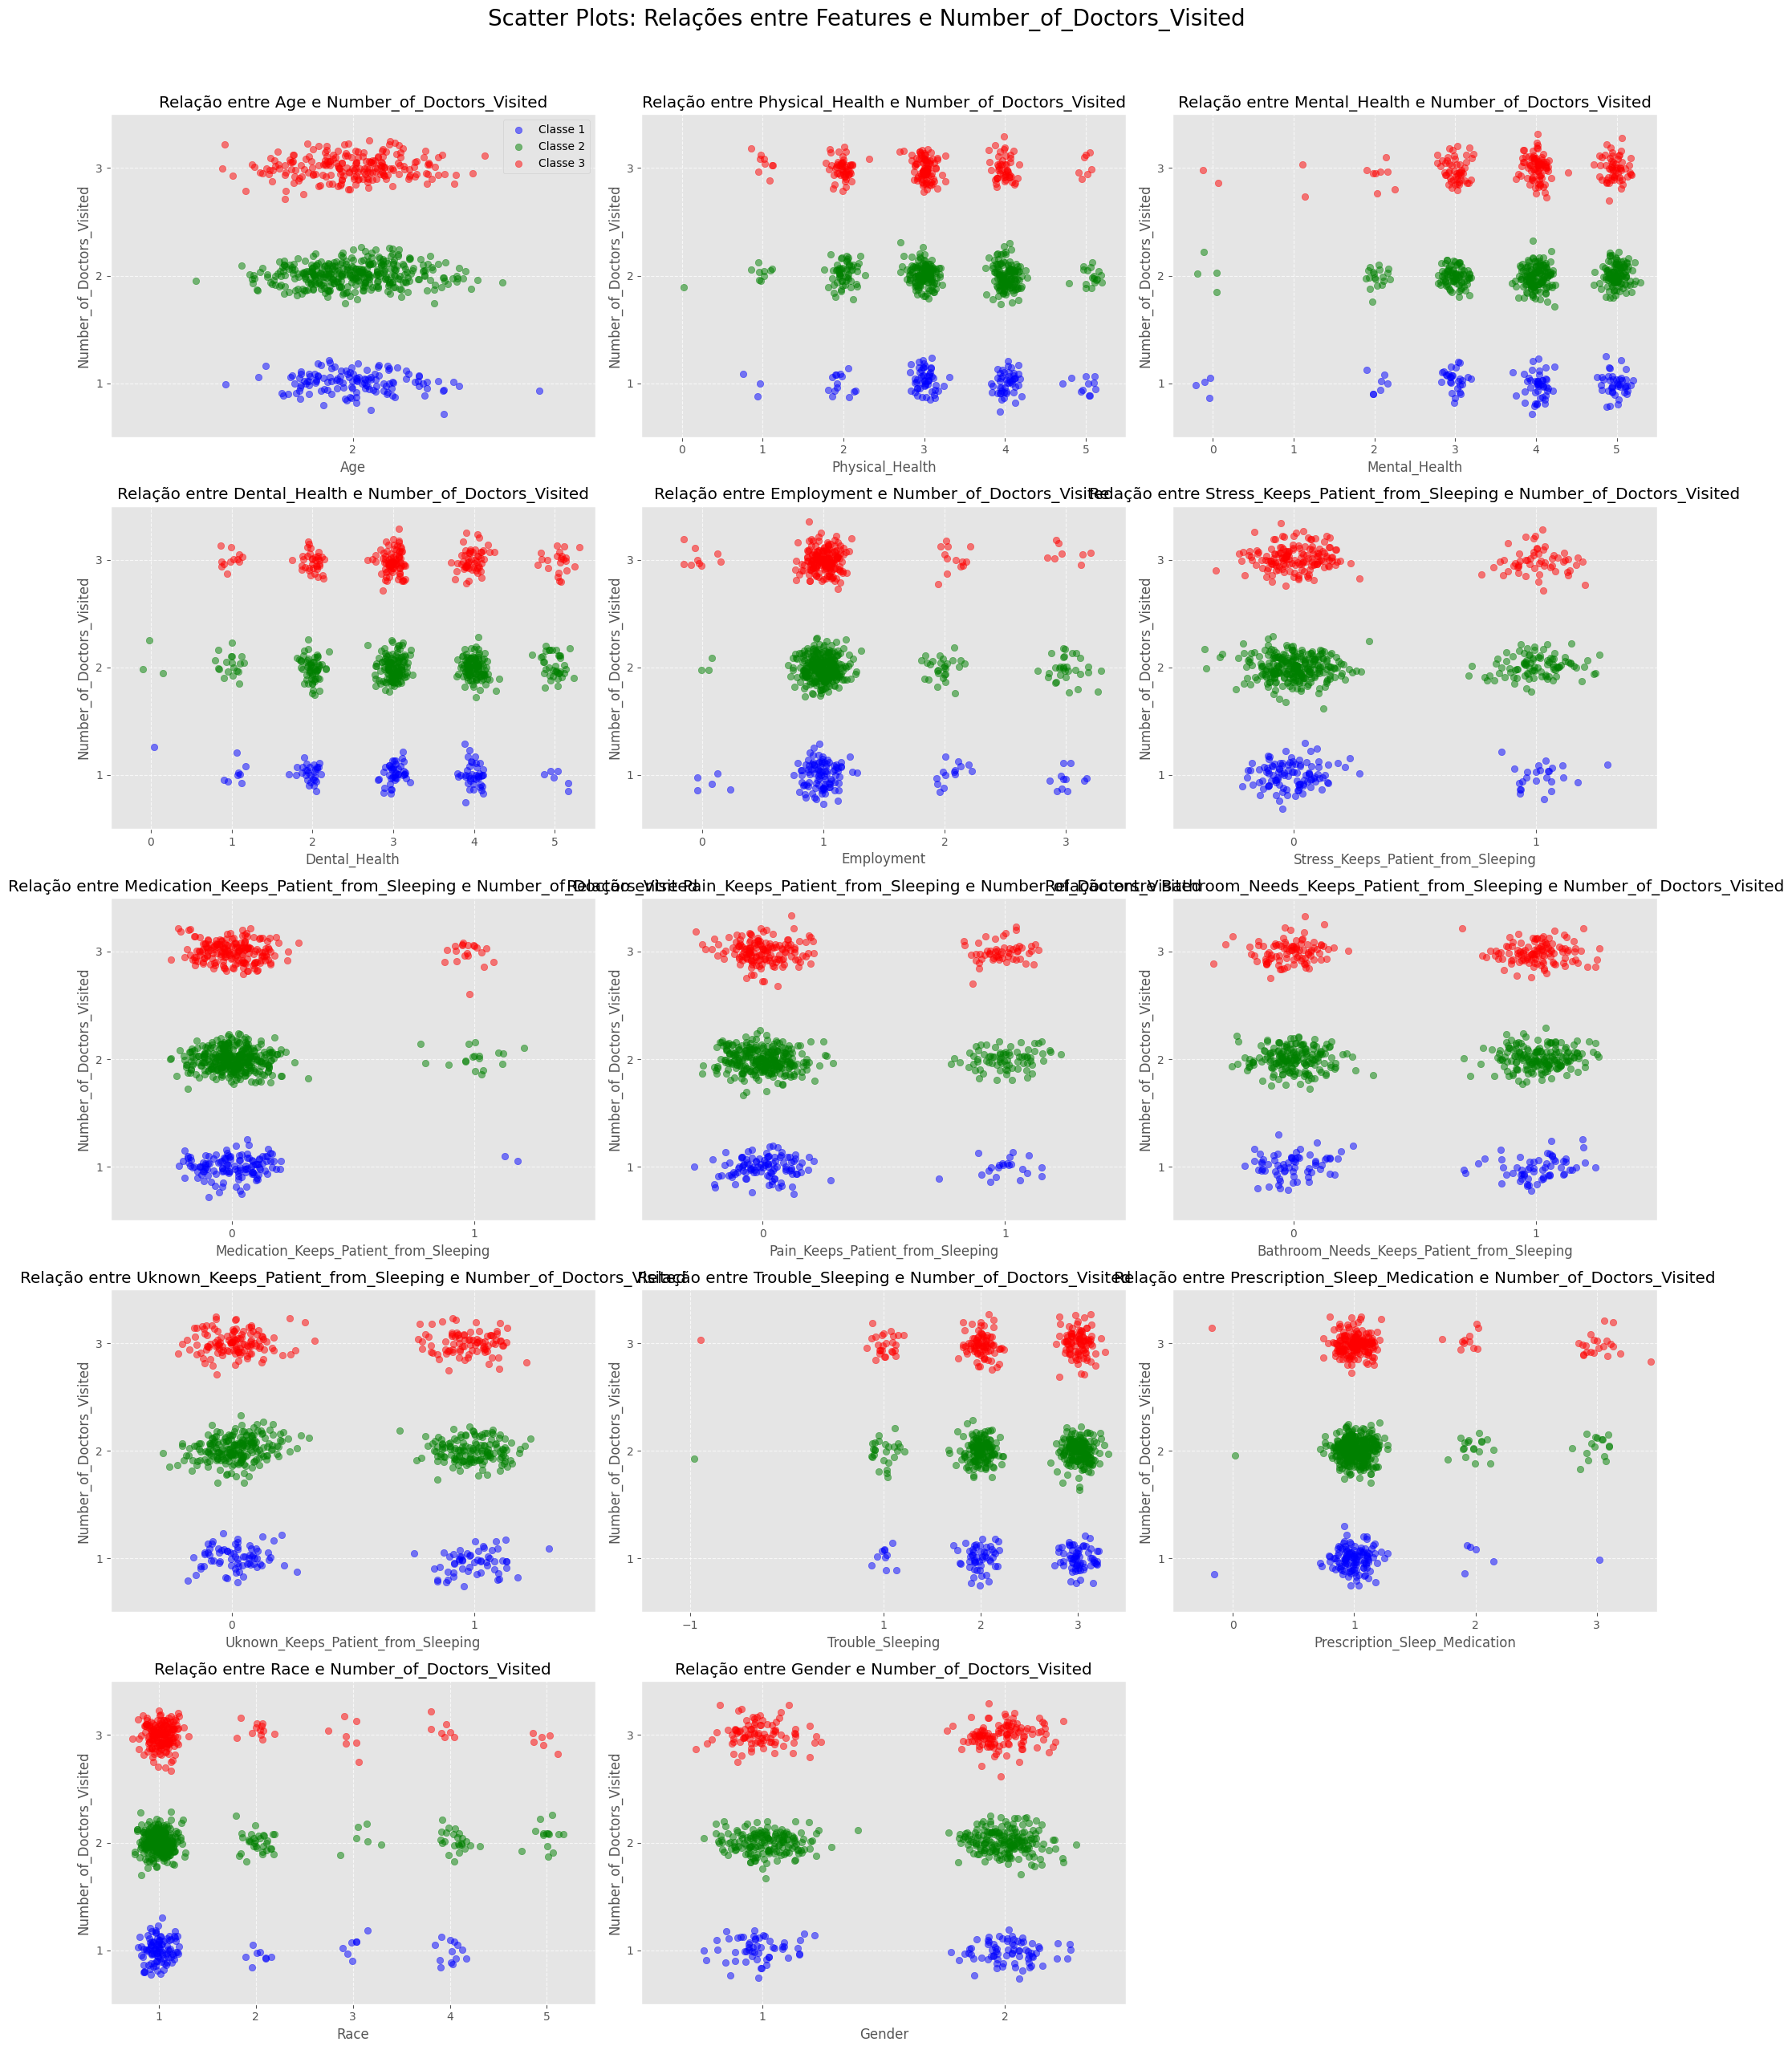

In [12]:
create_scatter_mosaic()

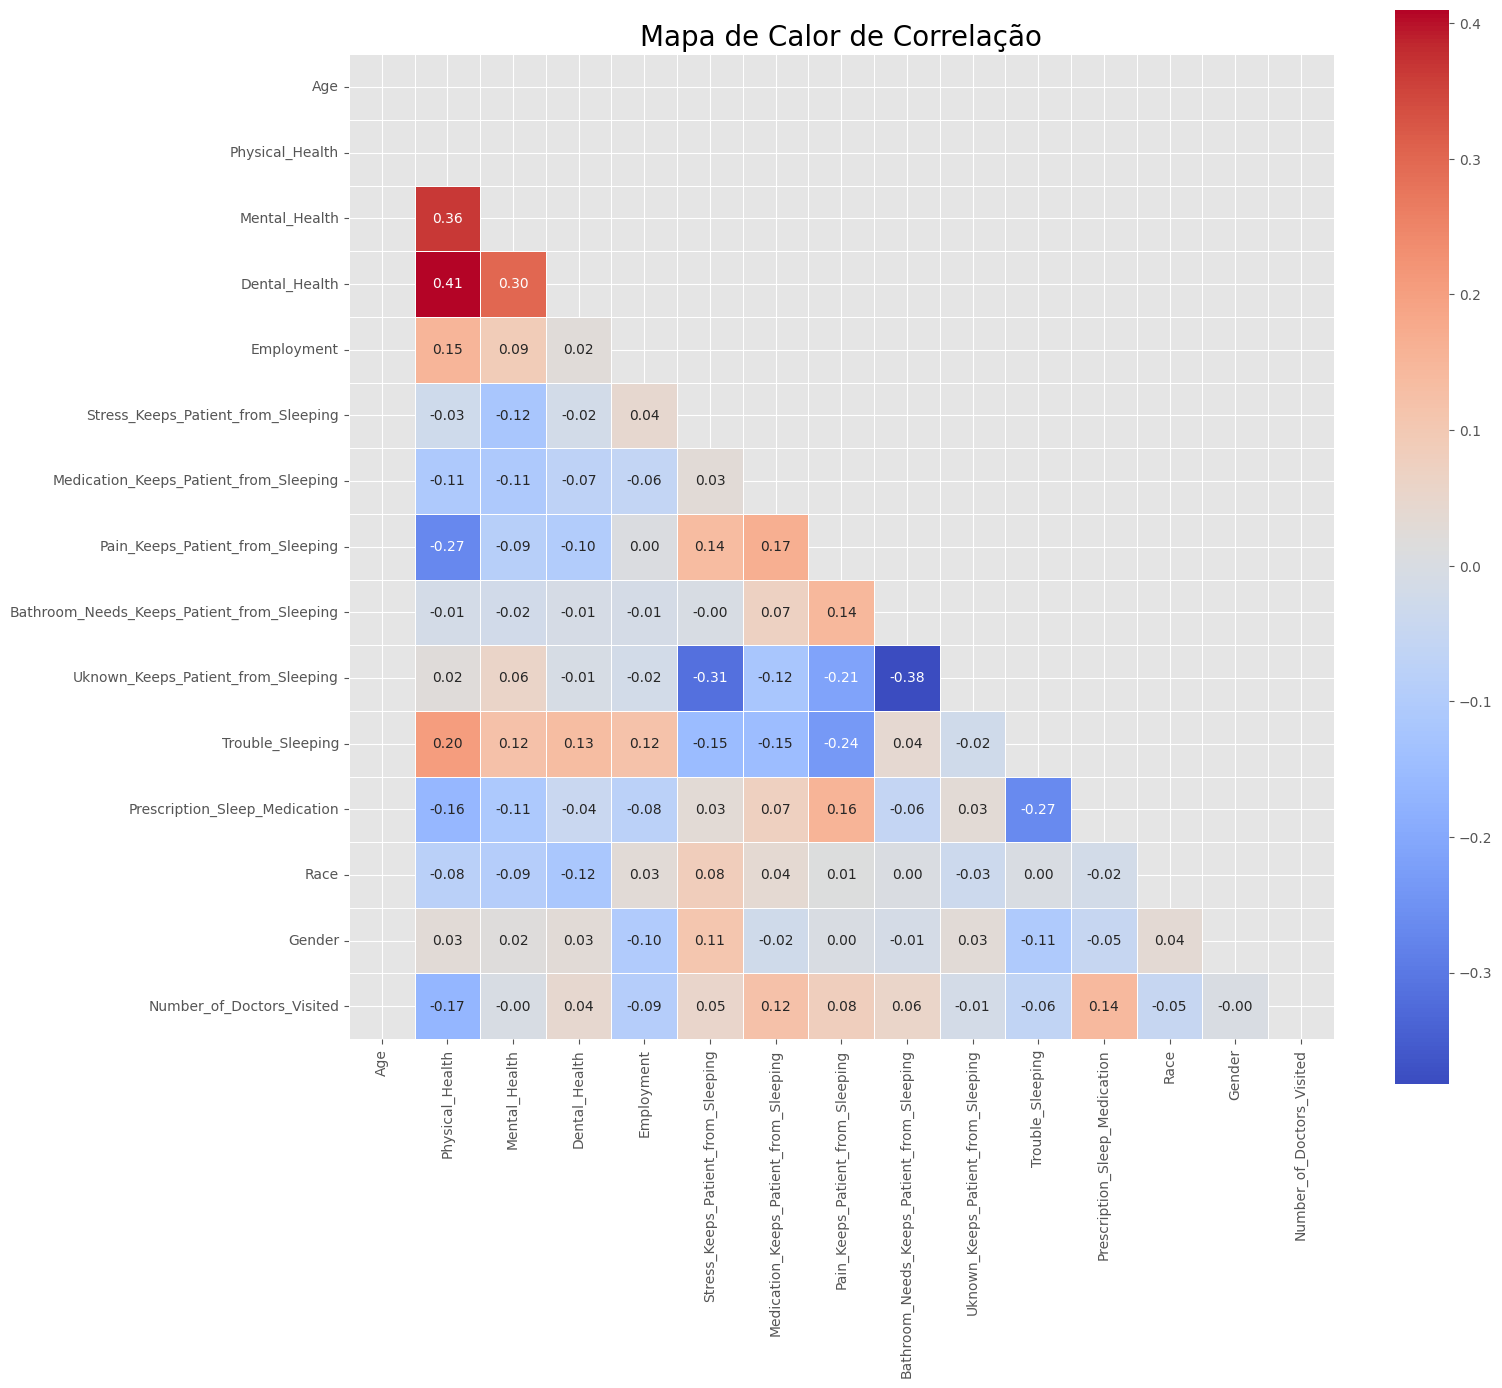

In [13]:
create_correlation_heatmap()

**Conclusão**: Ao analisar as features, tivemos as seguintes conclusões
1. No geral, muitas features do dataset apresentam pouca variabilidade
2. A target não tem uma correlaÇão linear muito forte com nenhuma feature
3. O número de visitas aos médicos não tem correlação com o estado mental dos indivíduos. Isso é inesperado.
4. A coluna de idade e gênero não tem correlação nenhuma com a target e podem ser dropada.
5. Por termos apenas variáveis categóricas e binárias, não teremos necessidade
de normalizar as features
6. O ideal é que usemos o SMOTE na etapa de treinamento devido ao desbalancemanto das features
7. Não temos colunas duplas, então não precisaremos fazer imputação das features, mas precisaremos remover as features duplicadas.
8. Um repameanto dos valores das features foi feito para fazer mais sentido e
precisamos mudar o valor '6' de Dental_Health para o valor da mediana, já que ele não estava presente
na descrição do dataset, indicando um ruído.
9. Trouble sleeping terá que ser dropada pois ela deveria ser binária e apresenta 3 valores (1, 2 e 3). Isso indica forte ruído e não tenho ideias
de como corrigir isso

# 2. Data Cleaning
Visando a Preparar o Conjunto de Dados para a modelagem, nessa etapa:
1. Iremos remover as linhas duplicadas


In [14]:
df = df.drop_duplicates()

# 3. Feature Engineering
Nesta etapa iremos escolher as melhores features do dataset com a seguinte metodologia:
1. Utilizaremos LR, RF, KNN, NB e Catboost para avaliar os datasets.
2. Separaremos uma cópia do dataset original
3. Utilizaremos o método anova e selecionaremos *k* features, com o valor de *k* variando entre 7 e 11 features, em que tiraremos a media do AUC_SCORE para o grupo de classificadores avaliadores. O *k* com melhor média será escolhido para a avalição final.
4. Utilizaremos algoritmo genético junto com random forests para selecionar o melhor subconjunto de features utilizando uma abordagem do tipo *wrapper*
5. Selecionaremos as features com melhor média de auc_score para o conjunto de classificadores.

**Funções Auxiliares**

In [24]:
# 2. Seleção de features por ANOVA
def select_features_anova(X_train, y_train, k):
    """Seleciona k features usando o método ANOVA"""
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X_train, y_train)

    # Obter os índices das features selecionadas
    selected_indices = selector.get_support(indices=True)

    # Obter os nomes das features selecionadas
    selected_features = X_train.columns[selected_indices]

    return selected_features


# 3. Avaliar conjunto de features com múltiplos classificadores
def evaluate_features(X_train, X_test, y_train, y_test, features):
    """Avalia um conjunto de features usando múltiplos classificadores"""
    # Definir lista de classificadores
    classifiers = [
        ("LR", LogisticRegression(max_iter=1000, random_state=42)),
        ("RF", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("KNN", KNeighborsClassifier(n_neighbors=5)),
        ("NB", GaussianNB()),
    ]

    classifiers.append(
        ("CatBoost", CatBoostClassifier(iterations=100, verbose=0, random_state=42))
    )

    # Selecionar apenas as features escolhidas
    X_train_selected = X_train[features]
    X_test_selected = X_test[features]

    # Escalar os dados para alguns algoritmos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    results = {}
    all_auc_scores = []

    # Avaliar cada classificador
    for name, clf in classifiers:
        # Alguns classificadores funcionam melhor com dados escalados
        if name in ["LR", "KNN", "NB"]:
            X_train_use = X_train_scaled
            X_test_use = X_test_scaled
        else:
            X_train_use = X_train_selected
            X_test_use = X_test_selected

        # Treinar o modelo
        clf.fit(X_train_use, y_train)

        # Calcular AUC score
        if hasattr(clf, "predict_proba"):
            y_prob = clf.predict_proba(X_test_use)
            auc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
        else:
            # Para classificadores que não têm predict_proba
            auc = 0.5  # Valor padrão, pior cenário

        all_auc_scores.append(auc)
        results[name] = auc

    # Calcular a média dos AUC scores
    mean_auc = np.mean(all_auc_scores)
    results["Mean"] = mean_auc

    return results, mean_auc


# 4. Testar diferentes valores de k com ANOVA
def evaluate_anova_with_different_k(X_train, X_test, y_train, y_test):
    """Testa ANOVA com diferentes valores de k (7 a 11)"""
    k_values = range(7, 15)  # 7 a 11 features
    k_results = {}
    best_k = None
    best_mean_auc = 0

    for k in k_values:
        print(f"\nAvaliando ANOVA com k={k}")
        # Selecionar features usando ANOVA
        selected_features = select_features_anova(X_train, y_train, k)

        # Avaliar com os classificadores
        results, mean_auc = evaluate_features(
            X_train, X_test, y_train, y_test, selected_features
        )

        # Armazenar resultados
        k_results[k] = {
            "features": selected_features,
            "results": results,
            "mean_auc": mean_auc,
        }

        print(f"Features selecionadas: {', '.join(selected_features)}")
        print(f"AUC médio: {mean_auc:.4f}")
        print(f"Detalhes: {results}")

        # Verificar se este é o melhor k
        if mean_auc > best_mean_auc:
            best_mean_auc = mean_auc
            best_k = k

    print(f"\nMelhor k: {best_k} com AUC score médio: {best_mean_auc:.4f}")
    print(
        f"Features selecionadas (melhor k): {', '.join(k_results[best_k]['features'])}"
    )

    return k_results, best_k

**Funções do Algoritmo Genético**


In [16]:
def generate_initial_population(n_features):
    """Gera a população inicial de cromossomos"""
    population = np.zeros((POPULATION_SIZE, n_features))

    for i in range(POPULATION_SIZE):
        # Determinar quantas features selecionar (entre MIN_FEATURES e MAX_FEATURES)
        n_selected = np.random.randint(MIN_FEATURES, min(MAX_FEATURES + 1, n_features))

        # Escolher aleatoriamente quais features selecionar
        selected_indices = np.random.choice(n_features, n_selected, replace=False)
        population[i, selected_indices] = 1

    return population


def evaluate_chromosome(X_train, X_test, y_train, y_test, chromosome, feature_names):
    """Avalia um cromossomo usando Random Forest"""
    # Selecionar as features de acordo com o cromossomo
    selected_features = feature_names[chromosome == 1]

    if len(selected_features) == 0:
        # Se nenhuma feature for selecionada, atribuir AUC zero
        return 0

    # Treinar o modelo com as features selecionadas
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train[selected_features], y_train)

    # Prever probabilidades para cada classe
    y_prob = rf.predict_proba(X_test[selected_features])

    # Calcular AUC score (multi-class one-vs-rest)
    try:
        auc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
    except ValueError:
        # Caso ocorra algum erro no cálculo do AUC, usar valor baixo
        auc = 0.5

    return auc


def evaluate_population(population, X_train, X_test, y_train, y_test, feature_names):
    """Avalia toda a população de cromossomos"""
    fitness_scores = np.zeros(POPULATION_SIZE)

    for i in range(POPULATION_SIZE):
        fitness_scores[i] = evaluate_chromosome(
            X_train, X_test, y_train, y_test, population[i], feature_names
        )

    return fitness_scores


def select_parents(population, fitness_scores):
    """Seleciona pais usando Roulette Wheel Selection"""
    # Número de elite (melhores indivíduos que serão mantidos para a próxima geração)
    elite_count = int(POPULATION_SIZE * ELITE_PERCENT)

    # Índices dos elite_count melhores indivíduos
    elite_indices = np.argsort(fitness_scores)[-elite_count:]

    # Seleção dos pais para o restante da população usando roleta
    weights = fitness_scores / (
        np.sum(fitness_scores) + 1e-10
    )  # Normalizar para soma = 1
    cumulative_weights = np.cumsum(weights)

    parents = np.zeros_like(population)

    # Primeiro adicionar a elite
    parents[:elite_count] = population[elite_indices]

    # Depois selecionar o restante usando a roleta
    for i in range(elite_count, POPULATION_SIZE):
        r = np.random.random()
        idx = np.searchsorted(cumulative_weights, r)
        if idx >= len(population):
            idx = len(population) - 1
        parents[i] = population[idx]

    return parents


def crossover_and_mutate(parents, n_features):
    """Aplica crossover e mutação nos pais para gerar filhos"""
    # Número de elite que será preservado
    elite_count = int(POPULATION_SIZE * ELITE_PERCENT)

    # Criar array para a nova população
    children = np.zeros_like(parents)

    # Manter a elite
    children[:elite_count] = parents[:elite_count]

    # Aplicar crossover no restante
    for i in range(elite_count, POPULATION_SIZE, 2):
        if i + 1 < POPULATION_SIZE:
            # Selecionar dois pais aleatoriamente
            parent_idx1 = np.random.randint(0, POPULATION_SIZE)
            parent_idx2 = np.random.randint(0, POPULATION_SIZE)

            # Escolher ponto de crossover
            crossover_point = np.random.randint(1, n_features)

            # Criar filhos com o crossover
            children[i, :crossover_point] = parents[parent_idx1, :crossover_point]
            children[i, crossover_point:] = parents[parent_idx2, crossover_point:]

            children[i + 1, :crossover_point] = parents[parent_idx2, :crossover_point]
            children[i + 1, crossover_point:] = parents[parent_idx1, crossover_point:]

    # Aplicar mutação em cada filho, exceto na elite
    for i in range(elite_count, POPULATION_SIZE):
        for j in range(n_features):
            if np.random.random() < MUTATION_PROBABILITY:
                # Inverter o bit (0->1 ou 1->0)
                children[i, j] = 1 - children[i, j]

        # Garantir que o número de features esteja dentro dos limites
        selected_count = np.sum(children[i])

        if selected_count < MIN_FEATURES:
            # Adicionar features se abaixo do mínimo
            zeros_indices = np.where(children[i] == 0)[0]
            if len(zeros_indices) > 0:
                add_count = min(MIN_FEATURES - selected_count, len(zeros_indices))
                add_indices = np.random.choice(
                    zeros_indices, int(add_count), replace=False
                )
                children[i, add_indices] = 1

        elif selected_count > MAX_FEATURES:
            # Remover features se acima do máximo
            ones_indices = np.where(children[i] == 1)[0]
            if len(ones_indices) > 0:
                remove_count = min(selected_count - MAX_FEATURES, len(ones_indices))
                remove_indices = np.random.choice(
                    ones_indices, int(remove_count), replace=False
                )
                children[i, remove_indices] = 0

    return children


def run_genetic_algorithm(X_train, X_test, y_train, y_test):
    """Executa o algoritmo genético completo"""
    n_features = X_train.shape[1]
    feature_names = X_train.columns

    print(
        f"\nExecutando algoritmo genético para selecionar entre {MIN_FEATURES} e {MAX_FEATURES} features..."
    )

    # Inicializar população
    population = generate_initial_population(n_features)

    # Armazenar o melhor fitness de cada geração
    best_fitness_history = np.zeros(MAX_GENERATIONS)
    best_chromosome = None
    best_fitness = 0

    # Executar por MAX_GENERATIONS gerações
    for generation in range(MAX_GENERATIONS):
        print(f"Geração {generation+1}/{MAX_GENERATIONS}")

        # Avaliar população atual
        fitness_scores = evaluate_population(
            population, X_train, X_test, y_train, y_test, feature_names
        )

        # Armazenar o melhor dessa geração
        generation_best_idx = np.argmax(fitness_scores)
        generation_best_fitness = fitness_scores[generation_best_idx]
        best_fitness_history[generation] = generation_best_fitness

        # Atualizar o melhor global
        if generation_best_fitness > best_fitness:
            best_fitness = generation_best_fitness
            best_chromosome = population[generation_best_idx].copy()

        print(f"  Melhor AUC score: {generation_best_fitness:.4f}")

        # Selecionar pais
        parents = select_parents(population, fitness_scores)

        # Criar nova população com crossover e mutação
        population = crossover_and_mutate(parents, n_features)

    # Selecionar as features com base no melhor cromossomo
    selected_features = feature_names[best_chromosome == 1]

    print(f"\nMelhores features selecionadas pelo GA: {', '.join(selected_features)}")
    print(f"Melhor AUC score: {best_fitness:.4f}")

    # Plotar evolução do fitness
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, MAX_GENERATIONS + 1), best_fitness_history, marker="o")
    plt.title("Evolução do AUC Score ao Longo das Gerações")
    plt.xlabel("Geração")
    plt.ylabel("Melhor AUC Score")
    plt.grid(True)
    plt.savefig("ga_evolution.png")
    plt.show()

    return selected_features, best_fitness, best_fitness_history

**Funções de Seleção das Melhores Features**

In [20]:
# 6. Selecionar as melhores features globalmente
def select_best_features(X_train, X_test, y_train, y_test):
    """Executa toda a metodologia e seleciona as melhores features"""
    # Parte 0: Avaliar o dataset original (todas as features)
    print("\n==== PARTE 0: Avaliação do Dataset Original (Todas as Features) ====")
    all_features = X_train.columns
    print(f"Número total de features: {len(all_features)}")
    all_features_results, all_features_mean_auc = evaluate_features(
        X_train, X_test, y_train, y_test, all_features
    )
    print(f"AUC médio com todas as features: {all_features_mean_auc:.4f}")
    print(f"Resultados detalhados: {all_features_results}")

    # Parte 1: Selecionar features usando ANOVA com diferentes valores de k
    print("\n==== PARTE 1: Seleção de Features com ANOVA ====")
    anova_results, best_k = evaluate_anova_with_different_k(
        X_train, X_test, y_train, y_test
    )

    # Parte 2: Selecionar features usando algoritmo genético
    print("\n==== PARTE 2: Seleção de Features com Algoritmo Genético ====")
    ga_features, ga_fitness, _ = run_genetic_algorithm(X_train, X_test, y_train, y_test)

    # Parte 3: Avaliar o conjunto de features do GA com todos os classificadores
    print(
        "\n==== PARTE 3: Avaliação das Features do GA com Múltiplos Classificadores ===="
    )
    ga_results, ga_mean_auc = evaluate_features(
        X_train, X_test, y_train, y_test, ga_features
    )
    print(f"Resultados do GA: {ga_results}")

    # Parte 4: Comparar resultados e escolher o melhor conjunto
    print("\n==== PARTE 4: Comparação Final e Seleção ====")
    anova_features = anova_results[best_k]["features"]
    anova_mean_auc = anova_results[best_k]["mean_auc"]

    print("\nComparação dos conjuntos de features:")
    print(f"Dataset original (todas as {len(all_features)} features):")
    print(f"  AUC score médio: {all_features_mean_auc:.4f}")
    print(f"\nANOVA (k={best_k}):")
    print(f"  Features: {', '.join(anova_features)}")
    print(f"  AUC score médio: {anova_mean_auc:.4f}")
    print("\nAlgoritmo Genético:")
    print(f"  Features: {', '.join(ga_features)}")
    print(f"  AUC score médio: {ga_mean_auc:.4f}")

    # Determinar o melhor conjunto
    best_auc = all_features_mean_auc
    best_features = all_features
    best_method = "Dataset Original (todas as features)"

    if anova_mean_auc > best_auc:
        best_auc = anova_mean_auc
        best_features = anova_features
        best_method = f"ANOVA (k={best_k})"

    if ga_mean_auc > best_auc:
        best_auc = ga_mean_auc
        best_features = ga_features
        best_method = "Algoritmo Genético"

    print("\n==== RESULTADO FINAL ====")
    print(f"Método selecionado: {best_method}")
    print(f"Features selecionadas: {', '.join(best_features)}")
    print(f"AUC score médio: {best_auc:.4f}")

    # Criando gráfico comparativo
    plt.figure(figsize=(12, 6))

    # Dados para o gráfico
    methods = ["Dataset Original", "ANOVA", "Algoritmo Genético"]
    auc_scores = [all_features_mean_auc, anova_mean_auc, ga_mean_auc]
    feature_counts = [len(all_features), len(anova_features), len(ga_features)]

    # Subplot para AUC scores
    plt.subplot(1, 2, 1)
    bars = plt.bar(methods, auc_scores, color=["lightgray", "skyblue", "lightgreen"])
    plt.title("Comparação de AUC Score")
    plt.ylim(0.5, 1.0)  # AUC score varia de 0.5 a 1.0
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(rotation=15, ha="right")

    # Destacar a melhor barra
    best_idx = np.argmax(auc_scores)
    bars[best_idx].set_color("gold")

    # Adicionar valores exatos
    for i, v in enumerate(auc_scores):
        plt.text(i, v + 0.01, f"{v:.4f}", ha="center")

    # Subplot para número de features
    plt.subplot(1, 2, 2)
    plt.bar(methods, feature_counts, color=["lightgray", "skyblue", "lightgreen"])
    plt.title("Número de Features Utilizadas")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(rotation=15, ha="right")

    # Adicionar valores exatos
    for i, v in enumerate(feature_counts):
        plt.text(i, v + 0.3, str(v), ha="center")

    plt.tight_layout()
    plt.savefig("feature_selection_comparison.png")
    plt.show()

    return best_features, best_method, best_auc

**Avaliação**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


==== PARTE 0: Avaliação do Dataset Original (Todas as Features) ====
Número total de features: 14
AUC médio com todas as features: 0.5692
Resultados detalhados: {'LR': 0.6370566599305628, 'RF': 0.5521336695673037, 'KNN': 0.521660180351932, 'NB': 0.6081357442213265, 'CatBoost': 0.5270341001063169, 'Mean': 0.5692040708354884}

==== PARTE 1: Seleção de Features com ANOVA ====

Avaliando ANOVA com k=7
Features selecionadas: Physical_Health, Mental_Health, Employment, Medication_Keeps_Patient_from_Sleeping, Pain_Keeps_Patient_from_Sleeping, Trouble_Sleeping, Prescription_Sleep_Medication
AUC médio: 0.5533
Detalhes: {'LR': 0.6243631247192658, 'RF': 0.5262309097165114, 'KNN': 0.5081411879763685, 'NB': 0.5764158890409654, 'CatBoost': 0.5314599637946621, 'Mean': 0.5533222150495546}

Avaliando ANOVA com k=8
Features selecionadas: Physical_Health, Mental_Health, Dental_Health, Employment, Medication_Keeps_Patient_from_Sleeping, Pain_Keeps_Patient_from_Sleeping, Trouble_Sleeping, Prescription_Sle

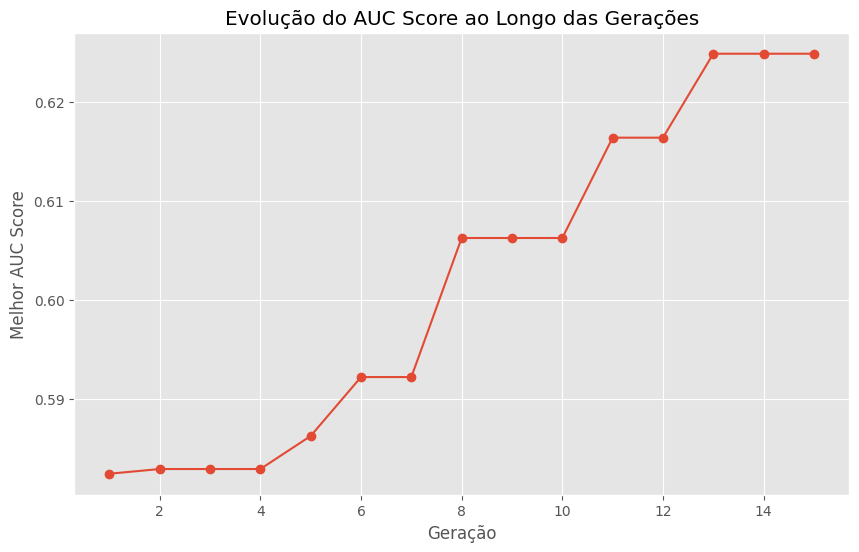


==== PARTE 3: Avaliação das Features do GA com Múltiplos Classificadores ====
Resultados do GA: {'LR': 0.6263018322317574, 'RF': 0.6249090947059185, 'KNN': 0.5696908481042772, 'NB': 0.6247233442177745, 'CatBoost': 0.6246022596756781, 'Mean': 0.6140454757870811}

==== PARTE 4: Comparação Final e Seleção ====

Comparação dos conjuntos de features:
Dataset original (todas as 14 features):
  AUC score médio: 0.5692

ANOVA (k=12):
  Features: Physical_Health, Mental_Health, Dental_Health, Employment, Stress_Keeps_Patient_from_Sleeping, Medication_Keeps_Patient_from_Sleeping, Pain_Keeps_Patient_from_Sleeping, Bathroom_Needs_Keeps_Patient_from_Sleeping, Trouble_Sleeping, Prescription_Sleep_Medication, Race, Gender
  AUC score médio: 0.5799

Algoritmo Genético:
  Features: Physical_Health, Dental_Health, Employment, Medication_Keeps_Patient_from_Sleeping, Pain_Keeps_Patient_from_Sleeping, Race, Gender
  AUC score médio: 0.6140

==== RESULTADO FINAL ====
Método selecionado: Algoritmo Genético


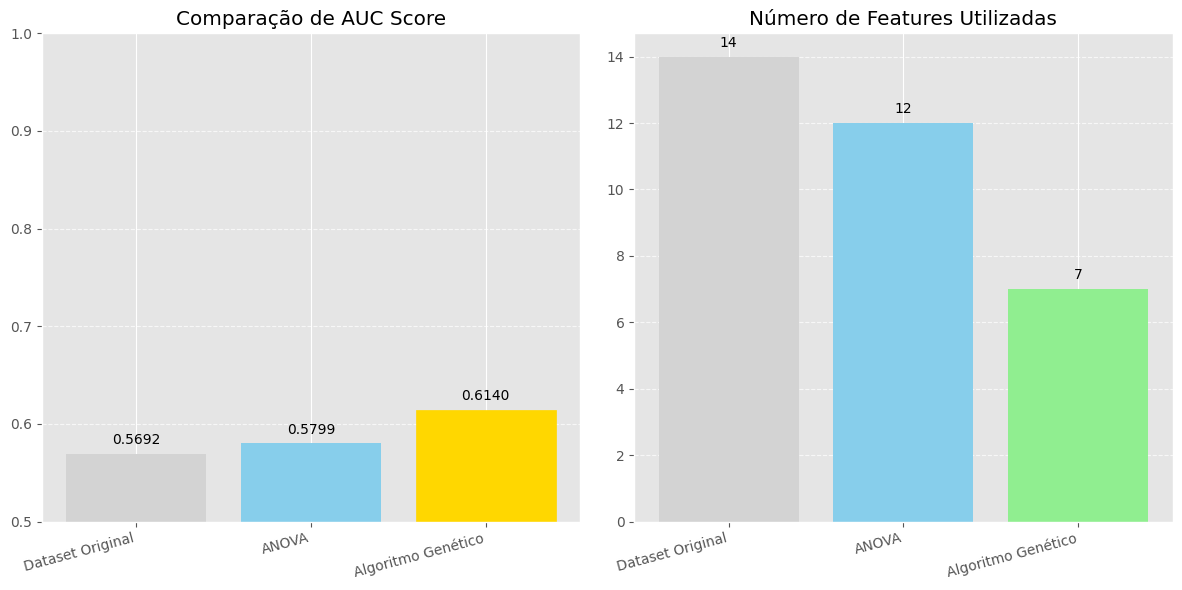

In [25]:
best_features, best_method, best_auc = select_best_features(
    X_train, X_test, y_train, y_test
)

In [27]:
print(f"Método selecionado: {best_method}")
print(f"Features selecionadas: {', '.join(best_features)}")
print(f"AUC score médio: {best_auc:.4f}")

Método selecionado: Algoritmo Genético
Features selecionadas: Physical_Health, Dental_Health, Employment, Medication_Keeps_Patient_from_Sleeping, Pain_Keeps_Patient_from_Sleeping, Race, Gender
AUC score médio: 0.6140


**Conclusão**
Utilizando os algoritmos genéticos, chegamos em 7 features que conseguiram o melhor auc_roc médio:

1. Physical_Health
2. Dental_Health
3. Employment
4. Medication_Keeps_Patient_from_Sleeping
5. Pain_Keeps_Patient_from_Sleeping
6. Race
7. Gender

# 4. Hyperparameter Tunning

Nesta seção utilizaremos Optuna para encontrar os melhores hiperparametros para os modelos abaixo utilizando Optune:



1. Decision Trees
2. Gradient Tree Boosting
3. k-Nearest Neighbors
4. LightGBM
5. Multinomial Logistic Regression
6. Naive Bayes
7. Neural Networks
8. Random Forests
9. Support Vector Machines
10. XGBoost
11. CatBoost



In [35]:
X_opt = df[best_features]
y_opt = df["Number_of_Doctors_Visited"]
X_train, X_test, y_train, y_test = train_test_split(
    X_opt, y_opt, test_size=0.2, random_state=42, stratify=y_opt
)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [37]:
# Funções objetivo para otimização de hiperparâmetros com Optuna
def objective_dt(trial, X, y, cv=5):
    """Função objetivo para Decision Trees"""
    param = {
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "random_state": 42,
    }

    model = DecisionTreeClassifier(**param)
    scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_gb(trial, X, y, cv=5):
    """Função objetivo para Gradient Boosting"""
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "random_state": 42,
    }

    model = GradientBoostingClassifier(**param)
    scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_knn(trial, X, y, cv=5):
    """Função objetivo para K-Nearest Neighbors"""
    param = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 30),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        "algorithm": trial.suggest_categorical(
            "algorithm", ["auto", "ball_tree", "kd_tree", "brute"]
        ),
        "p": trial.suggest_int("p", 1, 2),  # p=1: manhattan, p=2: euclidean
    }

    # Padronizar os dados para KNN
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = KNeighborsClassifier(**param)
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_lgbm(trial, X, y, cv=5):
    """Função objetivo para LightGBM"""
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "random_state": 42,
    }

    model = LGBMClassifier(**param)
    scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_lr(trial, X, y, cv=5):
    """Função objetivo para Multinomial Logistic Regression"""
    param = {
        "C": trial.suggest_float("C", 1e-4, 1e2, log=True),
        "solver": trial.suggest_categorical(
            "solver", ["newton-cg", "lbfgs", "sag", "saga"]
        ),
        "max_iter": 2000,  # fixo para garantir convergência
        "multi_class": "multinomial",
        "random_state": 42,
    }

    # Padronizar os dados para Regressão Logística
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = LogisticRegression(**param)
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_nb(trial, X, y, cv=5):
    """Função objetivo para Naive Bayes"""
    param = {
        "var_smoothing": trial.suggest_float("var_smoothing", 1e-12, 1e-2, log=True)
    }

    model = GaussianNB(**param)
    scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_rf(trial, X, y, cv=5):
    """Função objetivo para Random Forests"""
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "random_state": 42,
    }

    model = RandomForestClassifier(**param)
    scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_svm(trial, X, y, cv=5):
    """Função objetivo para Support Vector Machines"""
    param = {
        "C": trial.suggest_float("C", 1e-4, 1e2, log=True),
        "kernel": trial.suggest_categorical(
            "kernel", ["linear", "poly", "rbf", "sigmoid"]
        ),
        "gamma": trial.suggest_categorical("gamma", ["scale", "auto"]),
        "probability": True,  # Necessário para calcular AUC
        "random_state": 42,
    }

    # Padronizar os dados para SVM
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = SVC(**param)
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_xgb(trial, X, y, cv=5):
    """Função objetivo para XGBoost"""
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "random_state": 42,
    }

    model = XGBClassifier(**param)
    scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def objective_catboost(trial, X, y, cv=5):
    """Função objetivo para CatBoost"""
    param = {
        "iterations": trial.suggest_int("iterations", 50, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 10.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "grow_policy": trial.suggest_categorical(
            "grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]
        ),
        "random_seed": 42,
        "verbose": False,
    }

    model = CatBoostClassifier(**param)
    scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc_ovr_weighted")
    return scores.mean()


def optimize_models(X_train, y_train, dataset_name, n_trials=50, cv=5, timeout=None):
    """
    Otimiza os hiperparâmetros para todos os modelos listados usando Optuna

    Parâmetros:
    X_train (DataFrame): Dados de treino
    y_train (Series): Target de treino
    dataset_name (str): Nome do dataset (para identificação nos logs)
    n_trials (int): Número de tentativas para cada modelo
    cv (int): Número de folds para validação cruzada
    timeout (int): Tempo máximo em segundos para cada modelo (None = sem limite)

    Retorna:
    dict: Dicionário com os melhores parâmetros para cada modelo
    """
    # Definir os modelos e suas respectivas funções objetivo
    models = {
        "Decision Tree": objective_dt,
        "Gradient Boosting": objective_gb,
        "K-Nearest Neighbors": objective_knn,
        "LightGBM": objective_lgbm,
        "Logistic Regression": objective_lr,
        "Naive Bayes": objective_nb,
        "Random Forest": objective_rf,
        "Support Vector Machine": objective_svm,
        "XGBoost": objective_xgb,
        "CatBoost": objective_catboost,
    }

    best_params = {}
    best_scores = {}
    optimization_times = {}

    # Para cada modelo, criar e otimizar um estudo
    for model_name, objective_func in tqdm(
        models.items(), desc=f"Otimizando modelos ({dataset_name})"
    ):
        print(f"\nOtimizando hiperparâmetros para {model_name} - {dataset_name}...")
        start_time = time.time()

        study = optuna.create_study(
            direction="maximize",
            study_name=f"{model_name} Optimization - {dataset_name}",
        )

        # Criar closure para a função objetivo
        obj_func = lambda trial: objective_func(trial, X_train, y_train, cv)

        # Otimizar com limite de tempo
        try:
            study.optimize(obj_func, n_trials=n_trials, timeout=timeout)

            # Armazenar os melhores parâmetros e score
            best_params[model_name] = study.best_params
            best_scores[model_name] = study.best_value

            end_time = time.time()
            optimization_times[model_name] = end_time - start_time

            print(f"Melhor score para {model_name}: {study.best_value:.4f}")
            print(f"Melhores parâmetros para {model_name}: {study.best_params}")
            print(f"Tempo de otimização: {optimization_times[model_name]:.2f} segundos")

            # Salvar o estudo
            joblib.dump(
                study,
                f"{model_name.replace(' ', '_').lower()}_{dataset_name.lower()}_study.pkl",
            )

            # Visualizações
            try:
                # Histórico de otimização
                fig = plot_optimization_history(study)
                fig.write_image(
                    f"{model_name.replace(' ', '_').lower()}_{dataset_name.lower()}_optimization_history.png"
                )

                # Importância dos parâmetros
                fig = plot_param_importances(study)
                fig.write_image(
                    f"{model_name.replace(' ', '_').lower()}_{dataset_name.lower()}_param_importances.png"
                )
            except Exception as e:
                print(f"Aviso: Erro ao criar visualizações para {model_name}: {e}")

        except Exception as e:
            print(f"Erro durante a otimização de {model_name}: {e}")
            best_params[model_name] = None
            best_scores[model_name] = float("nan")
            optimization_times[model_name] = float("nan")

    # Exibir resumo de resultados
    print(f"\n=== Resumo dos Resultados de Otimização - {dataset_name} ===")
    results_df = pd.DataFrame(
        {
            "Modelo": list(models.keys()),
            "Melhor AUC": [best_scores.get(model, float("nan")) for model in models],
            "Tempo (s)": [
                optimization_times.get(model, float("nan")) for model in models
            ],
        }
    )

    # Ordenar por melhor score
    results_df = results_df.sort_values("Melhor AUC", ascending=False).reset_index(
        drop=True
    )
    print(results_df)

    # Criar gráfico de barras para comparar modelos
    plt.figure(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(results_df)))
    ax = sns.barplot(x="Modelo", y="Melhor AUC", data=results_df, palette=colors)
    plt.title(
        f"Comparação de AUC para Modelos Otimizados - {dataset_name}", fontsize=16
    )
    plt.ylabel("AUC Score", fontsize=14)
    plt.xlabel("Modelo", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0.5, 1.0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Adicionar valores
    for i, v in enumerate(results_df["Melhor AUC"]):
        ax.text(i, v + 0.01, f"{v:.4f}", ha="center")

    plt.tight_layout()
    plt.savefig(f"model_comparison_{dataset_name.lower()}.png")
    plt.show()

    return best_params, best_scores


def train_and_evaluate_models(
    X_train, X_test, y_train, y_test, best_params, dataset_name
):
    """
    Treina os modelos com os melhores hiperparâmetros e avalia no conjunto de teste

    Parâmetros:
    X_train, X_test, y_train, y_test: Dados para treinamento e avaliação
    best_params: Dicionário com os melhores hiperparâmetros para cada modelo
    dataset_name: Nome do dataset para identificação nos resultados

    Retorna:
    results: Dicionário com resultados detalhados
    results_df: DataFrame com resultados resumidos
    """
    results = defaultdict(dict)

    # Definir os construtores de modelos
    model_constructors = {
        "Decision Tree": DecisionTreeClassifier,
        "Gradient Boosting": GradientBoostingClassifier,
        "K-Nearest Neighbors": KNeighborsClassifier,
        "LightGBM": LGBMClassifier,
        "Logistic Regression": LogisticRegression,
        "Naive Bayes": GaussianNB,
        "Random Forest": RandomForestClassifier,
        "Support Vector Machine": SVC,
        "XGBoost": XGBClassifier,
        "CatBoost": CatBoostClassifier,
    }

    # Adicionar parâmetros fixos para alguns modelos
    fixed_params = {
        "Logistic Regression": {"max_iter": 2000, "multi_class": "multinomial"},
        "Support Vector Machine": {"probability": True},
    }

    # Treinar e avaliar cada modelo
    print(f"\n=== Treinamento e Avaliação de Modelos Otimizados - {dataset_name} ===")

    for model_name, constructor in tqdm(
        model_constructors.items(), desc=f"Treinando modelos ({dataset_name})"
    ):
        if best_params.get(model_name) is None:
            print(f"Pulando {model_name} - parâmetros não disponíveis")
            continue

        print(f"\nTreinando e avaliando {model_name}...")

        # Obter parâmetros otimizados
        params = best_params[model_name].copy()

        # Adicionar parâmetros fixos, se necessário
        if model_name in fixed_params:
            params.update(fixed_params[model_name])

        # Adicionar random_state para reprodutibilidade (se aplicável)
        if model_name not in ["K-Nearest Neighbors", "Naive Bayes"]:
            params["random_state"] = 42

        # Criar e treinar o modelo
        model = constructor(**params)

        # Treinar modelo
        model.fit(X_train, y_train)

        # Prever no conjunto de teste
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            auc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
        else:
            auc = float("nan")

        accuracy = accuracy_score(y_test, y_pred)

        # Armazenar resultados
        results[model_name]["model"] = model
        results[model_name]["accuracy"] = accuracy
        results[model_name]["auc"] = auc
        results[model_name]["confusion_matrix"] = confusion_matrix(y_test, y_pred)
        results[model_name]["classification_report"] = classification_report(
            y_test, y_pred
        )

        # Exibir resultados
        print(f"Acurácia: {accuracy:.4f}")
        print(f"AUC Score: {auc:.4f}")
        print("Matriz de Confusão:")
        print(confusion_matrix(y_test, y_pred))
        print("Relatório de Classificação:")
        print(classification_report(y_test, y_pred, zero_division=0))

    # Criar DataFrame com resultados
    results_df = pd.DataFrame(
        {
            "Modelo": list(results.keys()),
            "Acurácia": [
                results[model].get("accuracy", float("nan")) for model in results
            ],
            "AUC": [results[model].get("auc", float("nan")) for model in results],
        }
    )

    # Ordenar por melhor AUC
    results_df = results_df.sort_values("AUC", ascending=False).reset_index(drop=True)

    # Adicionar coluna de dataset
    results_df["Dataset"] = dataset_name

    # Exibir tabela de resultados
    print(f"\n=== Resultados Finais - {dataset_name} ===")
    print(results_df)

    # Plotar comparação de modelos
    plt.figure(figsize=(14, 10))

    # Subplot para acurácia
    plt.subplot(2, 1, 1)
    colors = plt.cm.viridis(np.linspace(0, 1, len(results_df)))
    ax1 = sns.barplot(x="Modelo", y="Acurácia", data=results_df, palette=colors)
    plt.title(
        f"Comparação de Acurácia para Modelos Otimizados - {dataset_name}", fontsize=16
    )
    plt.ylabel("Acurácia", fontsize=14)
    plt.ylim(0.5, 1.0)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Adicionar valores
    for i, v in enumerate(results_df["Acurácia"]):
        ax1.text(i, v + 0.01, f"{v:.4f}", ha="center")

    # Subplot para AUC
    plt.subplot(2, 1, 2)
    ax2 = sns.barplot(x="Modelo", y="AUC", data=results_df, palette=colors)
    plt.title(
        f"Comparação de AUC para Modelos Otimizados - {dataset_name}", fontsize=16
    )
    plt.ylabel("AUC Score", fontsize=14)
    plt.xlabel("Modelo", fontsize=14)
    plt.ylim(0.5, 1.0)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Adicionar valores
    for i, v in enumerate(results_df["AUC"]):
        ax2.text(i, v + 0.01, f"{v:.4f}", ha="center")

    plt.tight_layout()
    plt.savefig(f"model_evaluation_{dataset_name.lower()}.png")
    plt.show()

    return results, results_df


def select_best_models(results_original, results_smote, original_df, smote_df):
    """
    Seleciona a melhor versão de cada modelo (com ou sem SMOTE)

    Parâmetros:
    results_original: Resultados dos modelos treinados sem SMOTE
    results_smote: Resultados dos modelos treinados com SMOTE
    original_df: DataFrame de resultados sem SMOTE
    smote_df: DataFrame de resultados com SMOTE

    Retorna:
    best_models: DataFrame com os melhores modelos
    """
    # Criar um DataFrame de comparação
    comparison_data = []

    # Obter todos os modelos presentes em ambos os resultados
    all_models = set(original_df["Modelo"]).intersection(set(smote_df["Modelo"]))

    for model_name in all_models:
        # Obter resultados de ambos os conjuntos
        original_acc = original_df[original_df["Modelo"] == model_name][
            "Acurácia"
        ].values[0]
        original_auc = original_df[original_df["Modelo"] == model_name]["AUC"].values[0]

        smote_acc = smote_df[smote_df["Modelo"] == model_name]["Acurácia"].values[0]
        smote_auc = smote_df[smote_df["Modelo"] == model_name]["AUC"].values[0]

        # Determinar qual é melhor (usando AUC como critério principal)
        if smote_auc > original_auc:
            best_dataset = "SMOTE"
            best_acc = smote_acc
            best_auc = smote_auc
            best_model = results_smote.get(model_name, {}).get("model", None)
        else:
            best_dataset = "Original"
            best_acc = original_acc
            best_auc = original_auc
            best_model = results_original.get(model_name, {}).get("model", None)

        # Adicionar à lista de comparação
        comparison_data.append(
            {
                "Modelo": model_name,
                "Melhor Dataset": best_dataset,
                "Acurácia (Original)": original_acc,
                "Acurácia (SMOTE)": smote_acc,
                "Diferença Acurácia": smote_acc - original_acc,
                "AUC (Original)": original_auc,
                "AUC (SMOTE)": smote_auc,
                "Diferença AUC": smote_auc - original_auc,
                "Melhor Acurácia": best_acc,
                "Melhor AUC": best_auc,
                "Modelo Selecionado": best_model,
            }
        )

    # Criar DataFrame a partir dos dados de comparação
    best_models_df = pd.DataFrame(comparison_data)

    # Ordenar por melhor AUC
    best_models_df = best_models_df.sort_values(
        "Melhor AUC", ascending=False
    ).reset_index(drop=True)

    return best_models_df

In [ ]:
# 1. Otimizar hiperparâmetros para o dataset ORIGINAL (sem SMOTE)
print("\nOtimizando hiperparâmetros para o dataset ORIGINAL (sem SMOTE)...")
best_params_original, best_scores_original = optimize_models(
    X_train,
    y_train,
    dataset_name="Original",
    n_trials=30,
    cv=5,
    timeout=600,  # 10 minutos por modelo
)


Otimizando hiperparâmetros para o dataset ORIGINAL (sem SMOTE)...


Otimizando modelos (Original):   0%|          | 0/10 [00:00<?, ?it/s][I 2025-03-18 21:45:49,645] A new study created in memory with name: Decision Tree Optimization - Original
[I 2025-03-18 21:45:49,779] Trial 0 finished with value: 0.5004789020367618 and parameters: {'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.5004789020367618.



Otimizando hiperparâmetros para Decision Tree - Original...


[I 2025-03-18 21:45:49,851] Trial 1 finished with value: 0.5269988532206603 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 1 with value: 0.5269988532206603.
[I 2025-03-18 21:45:49,921] Trial 2 finished with value: 0.5160274638290058 and parameters: {'max_depth': 30, 'min_samples_split': 14, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 1 with value: 0.5269988532206603.
[I 2025-03-18 21:45:50,050] Trial 3 finished with value: 0.5230959936243206 and parameters: {'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 1 with value: 0.5269988532206603.
[I 2025-03-18 21:45:50,230] Trial 4 finished with value: 0.5314778288556813 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 4 with value: 0.5314778288556813.
[I 2025-03-18 21:45:50,329] Trial 5 finished with value: 0.5123104022674948 and para

Melhor score para Decision Tree: 0.5437
Melhores parâmetros para Decision Tree: {'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 2, 'criterion': 'gini'}
Tempo de otimização: 4.56 segundos


Otimizando modelos (Original):  10%|█         | 1/10 [00:05<00:45,  5.02s/it][I 2025-03-18 21:45:54,669] A new study created in memory with name: Gradient Boosting Optimization - Original


Aviso: Erro ao criar visualizações para Decision Tree: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Otimizando hiperparâmetros para Gradient Boosting - Original...


[I 2025-03-18 21:46:00,846] Trial 0 finished with value: 0.5487197435448892 and parameters: {'n_estimators': 116, 'learning_rate': 0.06134914093929579, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 8, 'subsample': 0.7890877450817778}. Best is trial 0 with value: 0.5487197435448892.
[I 2025-03-18 21:46:09,507] Trial 1 finished with value: 0.5412661182356265 and parameters: {'n_estimators': 202, 'learning_rate': 0.026764221753927755, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 9, 'subsample': 0.9286450410169398}. Best is trial 0 with value: 0.5487197435448892.
[I 2025-03-18 21:46:16,480] Trial 2 finished with value: 0.534248524733726 and parameters: {'n_estimators': 182, 'learning_rate': 0.2849885601993816, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 7, 'subsample': 0.7216120096650075}. Best is trial 0 with value: 0.5487197435448892.
[I 2025-03-18 21:46:21,334] Trial 3 finished with value: 0.5440011971203873 and parameters: {'n_estimators': 

In [ ]:
# 2. Otimizar hiperparâmetros para o dataset com SMOTE
print("\nOtimizando hiperparâmetros para o dataset com SMOTE...")
best_params_smote, best_scores_smote = optimize_models(
    X_train_smote,
    y_train_smote,
    dataset_name="SMOTE",
    n_trials=30,
    cv=5,
    timeout=600,  # 10 minutos por modelo
)

In [ ]:
# 3. Treinar e avaliar modelos com os melhores hiperparâmetros (dataset ORIGINAL)
print(
    "\nTreinando e avaliando modelos com os melhores hiperparâmetros (dataset ORIGINAL)..."
)
results_original, results_df_original = train_and_evaluate_models(
    X_train_original, X_test, y_train_original, y_test, best_params_original, "Original"
)

# 4. Treinar e avaliar modelos com os melhores hiperparâmetros (dataset com SMOTE)
print(
    "\nTreinando e avaliando modelos com os melhores hiperparâmetros (dataset com SMOTE)..."
)
results_smote, results_df_smote = train_and_evaluate_models(
    X_train_smote, X_test, y_train_smote, y_test, best_params_smote, "SMOTE"
)

# 5. Selecionar os melhores modelos (comparando com e sem SMOTE)
print("\nSelecionando os melhores modelos (comparando com e sem SMOTE)...")
best_models_df = select_best_models(
    results_original, results_smote, results_df_original, results_df_smote
)

# 6. Exibir resultados finais
print("\n=== RESULTADOS FINAIS ===")
print(best_models_df[["Modelo", "Melhor Dataset", "Melhor AUC", "Melhor Acurácia"]])

# 7. Visualizar comparação final
plt.figure(figsize=(14, 10))

models = best_models_df["Modelo"]
auc_original = best_models_df["AUC (Original)"]
auc_smote = best_models_df["AUC (SMOTE)"]
best_dataset = best_models_df["Melhor Dataset"]

x = np.arange(len(models))
width = 0.35

# Criar barras para Original e SMOTE
bar1 = plt.bar(
    x - width / 2, auc_original, width, label="Original", color="skyblue", alpha=0.7
)
bar2 = plt.bar(
    x + width / 2, auc_smote, width, label="SMOTE", color="lightgreen", alpha=0.7
)

# Destacar o melhor dataset para cada modelo
for i, ds in enumerate(best_dataset):
    if ds == "Original":
        bar1[i].set_alpha(1.0)
        bar1[i].set_edgecolor("black")
        bar1[i].set_linewidth(1.5)
    else:  # SMOTE
        bar2[i].set_alpha(1.0)
        bar2[i].set_edgecolor("black")
        bar2[i].set_linewidth(1.5)

plt.xlabel("Modelo", fontsize=14)
plt.ylabel("AUC Score", fontsize=14)
plt.title("Comparação de AUC: Original vs SMOTE (melhor destacado)", fontsize=16)
plt.xticks(x, models, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(0.5, 1.0)

# Adicionar valores
for i, v in enumerate(auc_original):
    plt.text(i - width / 2, v + 0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)

for i, v in enumerate(auc_smote):
    plt.text(i + width / 2, v + 0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.savefig("final_comparison.png")
plt.show()

# 8. Identificar o melhor modelo geral
best_model_idx = best_models_df["Melhor AUC"].idxmax()
best_model_row = best_models_df.iloc[best_model_idx]
best_model_name = best_model_row["Modelo"]
best_dataset_name = best_model_row["Melhor Dataset"]
best_model = best_model_row["Modelo Selecionado"]

print(f"\nMelhor modelo geral: {best_model_name} ({best_dataset_name})")
print(f"AUC: {best_model_row['Melhor AUC']:.4f}")
print(f"Acurácia: {best_model_row['Melhor Acurácia']:.4f}")

# 9. Salvar o melhor modelo
if best_model is not None:
    joblib.dump(best_model, f"best_model_{best_dataset_name.lower()}.pkl")
    print(f"Melhor modelo salvo como 'best_model_{best_dataset_name.lower()}.pkl'")

    # 10. Se for um modelo baseado em árvore, mostrar a importância das features
    if hasattr(best_model, "feature_importances_"):
        importances = pd.DataFrame(
            {"Feature": features, "Importance": best_model.feature_importances_}
        ).sort_values("Importance", ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importance", y="Feature", data=importances)
        plt.title(
            f"Importância das Features para {best_model_name} ({best_dataset_name})"
        )
        plt.tight_layout()
        plt.savefig("feature_importance.png")
        plt.show()

        print("\nImportância das Features:")
        print(importances)

# 11. Resumo sobre SMOTE vs Original
smote_wins = (best_models_df["Melhor Dataset"] == "SMOTE").sum()
original_wins = (best_models_df["Melhor Dataset"] == "Original").sum()
total_models = len(best_models_df)

print("\n=== Resumo SMOTE vs Original ===")
print(f"Total de modelos avaliados: {total_models}")
print(
    f"Modelos onde SMOTE foi melhor: {smote_wins} ({smote_wins/total_models*100:.1f}%)"
)
print(
    f"Modelos onde Original foi melhor: {original_wins} ({original_wins/total_models*100:.1f}%)"
)

# Estatísticas adicionais
avg_diff_auc = (best_models_df["AUC (SMOTE)"] - best_models_df["AUC (Original)"]).mean()
avg_diff_acc = (
    best_models_df["Acurácia (SMOTE)"] - best_models_df["Acurácia (Original)"]
).mean()

print(f"\nDiferença média de AUC (SMOTE - Original): {avg_diff_auc:.4f}")
print(f"Diferença média de Acurácia (SMOTE - Original): {avg_diff_acc:.4f}")

if smote_wins > original_wins:
    print(
        "\nConclusão: No geral, SMOTE melhorou o desempenho dos modelos para este problema."
    )
else:
    print(
        "\nConclusão: No geral, usar o dataset original produziu melhores resultados para este problema."
    )

print("\nProcesso concluído!")